# 필요 라이브러리 import

In [1]:
# 데이터 전처리 도구 불러오기
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 검정 통계 라이브러리
import scipy.stats as stats
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols

# vif 계산 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Scaler 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 선형 회귀분석 머신러닝 모델 불러오기
from  sklearn.linear_model import LinearRegression, Lasso, Ridge

# 트리 기반 회귀분석 머신러닝 모델 불러오기
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

# GridSearch, RandomizedSearch 도구 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 평가 지표 불러오기
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, make_scorer

# 경고 에러 무시 라이브러리 (최신 버전이 아님 이슈 메세지 제거)
import warnings

# kaggle basic option
import os

# 데이터 불러오기

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename == 'train.csv':
            train_df = pd.read_csv(os.path.join(dirname, filename))
        else:
            test_df = pd.read_csv(os.path.join(dirname, filename))
            

df_lst = [train_df, test_df]
print('upload complete')

upload complete


In [3]:
for df in df_lst:
    display(df.head(5))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# 데이터 EDA
---

## 데이터 컬럼의 내용

| 컬럼명      | 데이터 타입  | 설명                                      |
|-------------|--------------|-------------------------------------------|
| datetime    | datetime     | 자전거 대여 기록의 날짜 및 시간 (e.g : 2011-01-01 00:00:00) |
| season      | int          | 계절 (1:봄, 2:여름, 3:가을, 4:겨울)       |
| holiday     | int          | 공휴일 여부 (0: 평일, 1: 공휴일)          |
| workingday  | int          | 근무일 여부 (0: 주말/공휴일, 1: 근무일)   |
| weather     | int          | 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설) |
| temp        | float        | 실측 온도 (섭씨)                          |
| atemp       | float        | 체감 온도 (섭씨)                          |
| humidity    | int          | 습도 (%)                                  |
| windspeed   | float        | 풍속 (m/s)                               |
| casual      | int          | 등록되지 않은 사용자의 대여 수           |
| registered  | int          | 등록된 사용자의 대여 수                   |
| count       | int          | 총 대여 수 (종속 변수)                    |


## 데이터의 크기 확인

---

In [4]:
for df in df_lst:
    display(df.shape)

(10886, 12)

(6493, 9)

## 데이터의 Info값 확인

---

In [5]:
for i, df in enumerate(df_lst):
    if i == 0:
        print('result of train_df.info()')
    else:
        print('result of test_df.info()')
    display(df.info())
    print('\n')

result of train_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None



result of test_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

datetime의 컬럼이 ``datetime``으로 컬럼으로 표기되어야 하지만 ``object``로 표기되어 있으므로 ``datetime`` 타입으로 변환 진행

In [6]:
for i, df in enumerate(df_lst):
    if i == 0:
        print('result of train_df.info() after pd.to_datetime')
    else:
        print('result of test_df.info() after pd.to_datetime')

    df['datetime'] = pd.to_datetime(df['datetime'])
    display(df.info())
    print('\n')

result of train_df.info() after pd.to_datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None



result of test_df.info() after pd.to_datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


None

## 결측치 확인

---

In [7]:
for i, df in enumerate(df_lst):
    if i == 0:
        print('result of train_df.isnull().sum()')
    else:
        print('result of test_df.isnull().sum()')
    print('\n')
    display(df.isnull().sum())
    print('-'*50)

result of train_df.isnull().sum()




datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

--------------------------------------------------
result of test_df.isnull().sum()




datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

--------------------------------------------------


결측치는 없는 것으로 판단

## 데이터 요약 확인


---

In [8]:
for i, df in enumerate(df_lst):
    if i == 0:
        print('describe of train_df')
    else:
        print('describe of test_df')
    display(df.describe())
    print('\n')

describe of train_df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454




describe of test_df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


- 범주형 변수는 ``season``, ``holiday``, ``workingday``, ``weather``, ``datetime``
- 이산형 변수는 ``temp``, ``atemp``, ``humidity``, ``windspeed``
- 크게 이상치가 나타날 것이라고 예상되는 컬럼은 ``windspeed``, ``casual``, ``registered``, ``count``
- 모델의 성능을 비교하기 위해 스케일링 전 이상치 제거를 실시함.

## 데이터 기간 확인

---

In [9]:
for i, df in enumerate(df_lst):
    if i == 0:
        print(f'time range of train_df : {df["datetime"].min()} ~ {df["datetime"].max()}')
    else:
        print(f'time range of test_df : {df["datetime"].min()} ~ {df["datetime"].max()}')

time range of train_df : 2011-01-01 00:00:00 ~ 2012-12-19 23:00:00
time range of test_df : 2011-01-20 00:00:00 ~ 2012-12-31 23:00:00


## datetime 데이터를 연/월/일/시간 별로 분리하여 저장

In [10]:
for df in df_lst:
    # 연/월/일/시간 별로 분리하여 따로 저장
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour

    # datetime 컬럼 삭제
    df.drop(labels='datetime', axis=1, inplace=True)

    # 변경된 DataFrame 출력
    display(df.head(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## 월별 미등록 사용자와 등록자 사용자의 자전거 대여 수

---

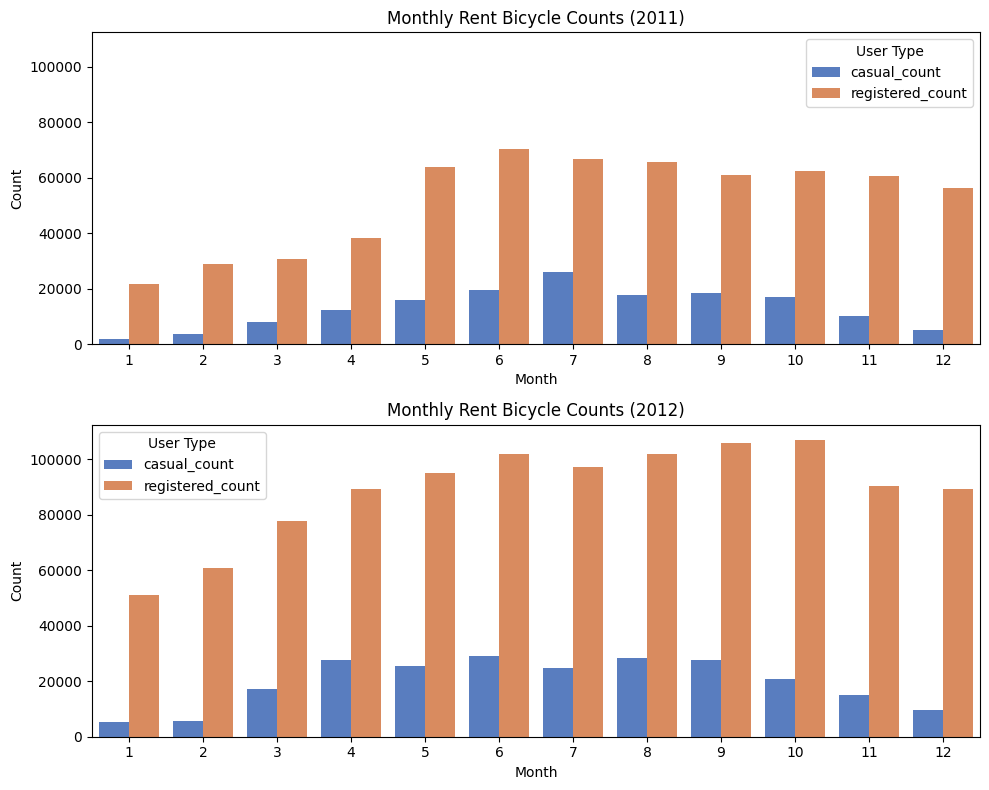

,month,casual_2011,casual_2012,casual_growth_rate,registered_2011,registered_2012,registered_growth_rate
0,1,2008,5244,161.155378,21544,51088,137.133309
1,2,3776,5521,46.212924,29068,60748,108.985826
2,3,7910,17146,116.763590,30825,77620,151.808597
3,4,12229,27584,125.562188,38288,89301,133.234956
4,5,15865,25420,60.226915,63848,95014,48.812805
5,6,19600,28974,47.826531,70176,101983,45.324612
6,7,26145,24802,-5.136737,66703,96967,45.371273
7,8,17580,28290,60.921502,65716,101930,55.106823
8,9,18311,27590,50.674458,60793,105835,74.090767
9,10,17159,20928,21.965149,62363,106984,71.550439


casual 이용객 총 증가율 : 51.66%
registered 이용객 총 증가율 : 70.43%




In [11]:
# 데이터 변환 (연도별 집계)
df_2011 = train_df[train_df['year'] == 2011].groupby('month').agg(
    casual_count=('casual', 'sum'),
    registered_count=('registered', 'sum')
).reset_index()

df_2012 = train_df[train_df['year'] == 2012].groupby('month').agg(
    casual_count=('casual', 'sum'),
    registered_count=('registered', 'sum')
).reset_index()

# 데이터 변형: melt 적용
df_2011_melted = df_2011.melt(id_vars=['month'], var_name='user_type', value_name='count')
df_2012_melted = df_2012.melt(id_vars=['month'], var_name='user_type', value_name='count')

# 연도별 그래프 분리 (세로 배치)
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

# for문을 통한 그래프 위 아래 배치
for i in range(len([df_2011_melted, df_2012_melted])):
    if i == 0:
        data = df_2011_melted
        title = 'Monthly Rent Bicycle Counts (2011)'
    else:
        data = df_2012_melted
        title = 'Monthly Rent Bicycle Counts (2012)'

    sns.barplot(ax=axes[i], data=data, x='month', y='count', hue='user_type', palette='muted')
    axes[i].set_title(title)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='User Type')

plt.tight_layout()
plt.show()

# 월별 미등록 사용자와 등록자 사용자의 자전거 대여 수 DataFrame화
diff_df = pd.DataFrame()
diff_df['month'] = df_2011['month']
diff_df['casual_2011'] = df_2011['casual_count']
diff_df['casual_2012'] = df_2012['casual_count']
diff_df['casual_growth_rate'] = ((df_2012['casual_count'] - df_2011['casual_count']) / df_2011['casual_count']) * 100
diff_df['registered_2011'] = df_2011['registered_count']
diff_df['registered_2012'] = df_2012['registered_count']
diff_df['registered_growth_rate'] = ((df_2012['registered_count'] - df_2011['registered_count']) / df_2011['registered_count']) * 100
display(diff_df)

# 2011년 대비 2012년의 전체 증가율
casual_2011_sum = diff_df['casual_2011'].sum()
casual_2012_sum = diff_df['casual_2012'].sum()
print(f'casual 이용객 총 증가율 : {(casual_2012_sum - casual_2011_sum) / casual_2011_sum * 100:.2f}%')
registered_2011_sum = diff_df['registered_2011'].sum()
registered_2012_sum = diff_df['registered_2012'].sum()
print(f'registered 이용객 총 증가율 : {(registered_2012_sum - registered_2011_sum) / registered_2011_sum * 100:.2f}%')
print('\n')

- 2011년 대비 2012년 casual 이용객의 총 증가율은 약 51.66% 증가하였고, registered 이용객의 총 증가율은 약 70.43% 증가하였다.
- 2012년 7월의 casual 유저의 수는 2011년 대비 감소한 추세를 보였다.

## 각 컬럼별 대여량 분포 확인

---

In [12]:
# 각 컬럼별총 대여량 확인 함수 생성
def graph_func(kind, col):
    # 시간대 별 자전거 평균 대여량
    if kind == 'line':
        train_df_groupby = train_df.groupby(col).agg(
            mean_count = ('count', 'mean')
        ).reset_index()

        plt.figure(figsize=(15, 8))
        sns.lineplot(data=train_df_groupby, x=col[1], y='mean_count', hue=col[0], palette='muted', marker='o')
        plt.xlabel(col[1])
        plt.ylabel('count')
        plt.grid()
        plt.title('Average Annual Bicycle Capacity')
        plt.legend()
        plt.show()

    # 날씨별 자전거 총 대여량
    elif kind == 'bar':
        train_df_groupby = train_df.groupby(col).agg(
            total_count = ('count', 'sum')
        ).reset_index()
        
        plt.figure(figsize=(15, 8))
        sns.barplot(data=train_df_groupby, x=col, y='total_count', palette='muted')
        plt.xlabel(col)
        plt.ylabel('count')
        plt.title('Total Bicycle Capacity by Weather (2011~2012)')
        plt.legend()
        plt.show()
        
    # 계절별 자전거 대여량 분포
    else:
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=train_df, x=col, y='count', palette='muted')
        plt.xlabel(col)
        plt.ylabel('count')
        plt.title('Distribution of Bicycle Capacity by Season')
        plt.legend()
        plt.show()

### 시간대별 자전거 총 대여량

---

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

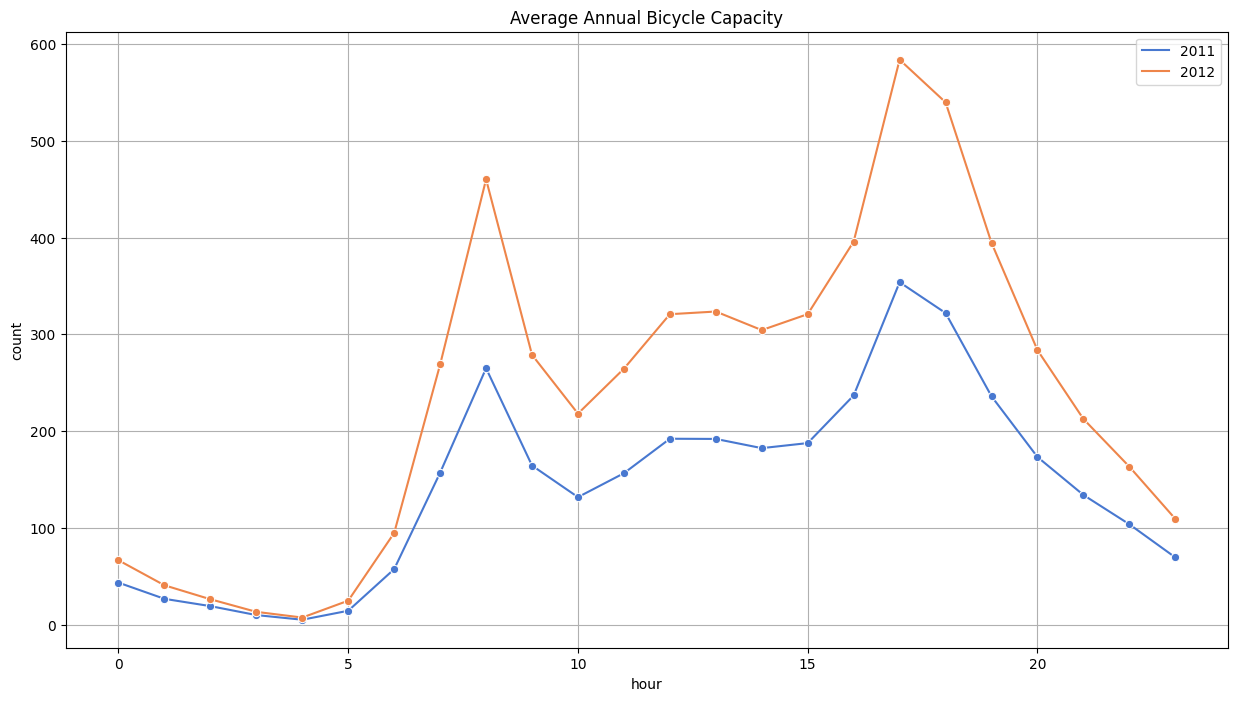

In [13]:
graph_func('line', ['year', 'hour'])

출근 시간대인 8시와 퇴근 시간대인 17~18시에 많은 대여량을 볼 수 있다.

### 날씨별 자전거 총 대여량

---

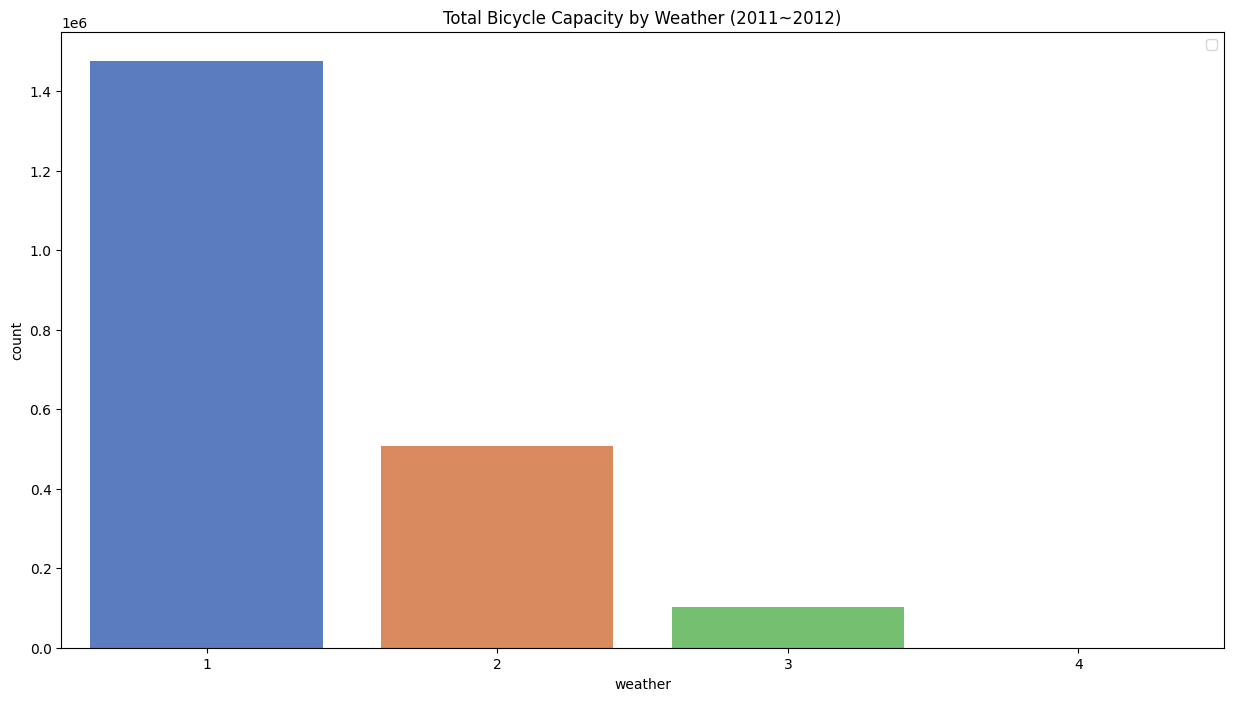

In [14]:
graph_func('bar', 'weather')

날씨가 좋지 않은 폭우와 폭설이 오는 날에는 자전거 대여량 건수가 현저히 적은 것을 볼 수 있다.

### 계절별 자전거 대여량 분포

---

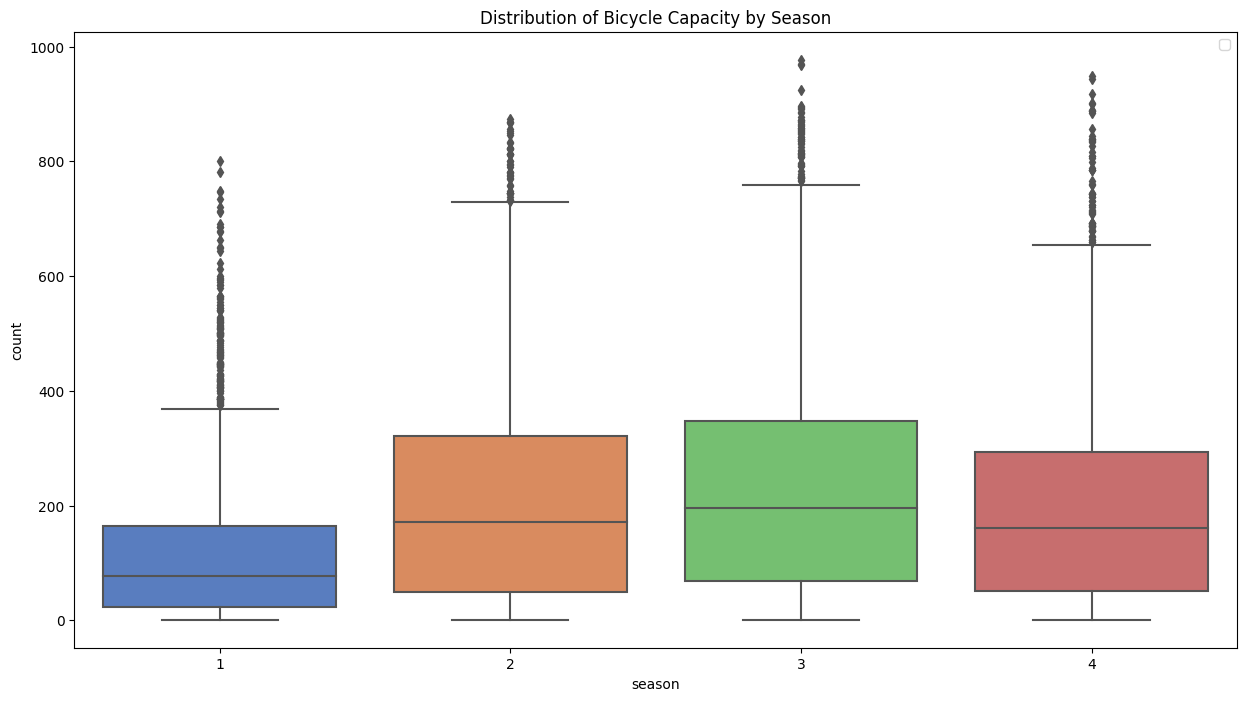

In [15]:
graph_func('box', 'season')

여름과 겨울에 가장 많은 대여량을 보이고 있다.

## 온도, 습도, 풍속에 따른 자전거 총 대여량 분포

---

Temp Graph and DataFrame:


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


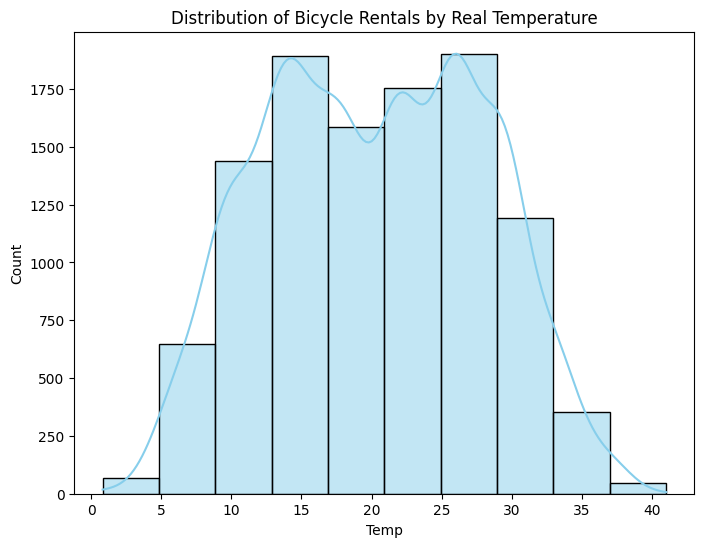

,bin_start,bin_end,count
0,0.820,4.756,48
1,4.756,8.692,305
2,8.692,12.628,1004
3,12.628,16.564,1022
4,16.564,20.500,642
5,20.500,24.436,850
6,24.436,28.372,1271
7,28.372,32.308,922
8,32.308,36.244,349
9,36.244,40.180,80


Atemp Graph and DataFrame:


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


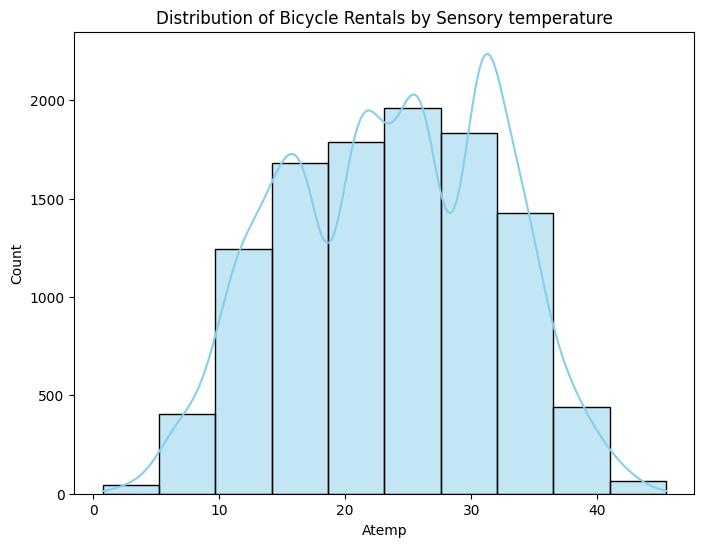

,bin_start,bin_end,count
0,0.0,5.0,34
1,5.0,10.0,253
2,10.0,15.0,957
3,15.0,20.0,921
4,20.0,25.0,1060
5,25.0,30.0,1239
6,30.0,35.0,1479
7,35.0,40.0,406
8,40.0,45.0,131
9,45.0,50.0,13


Humidity Graph and DataFrame:


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


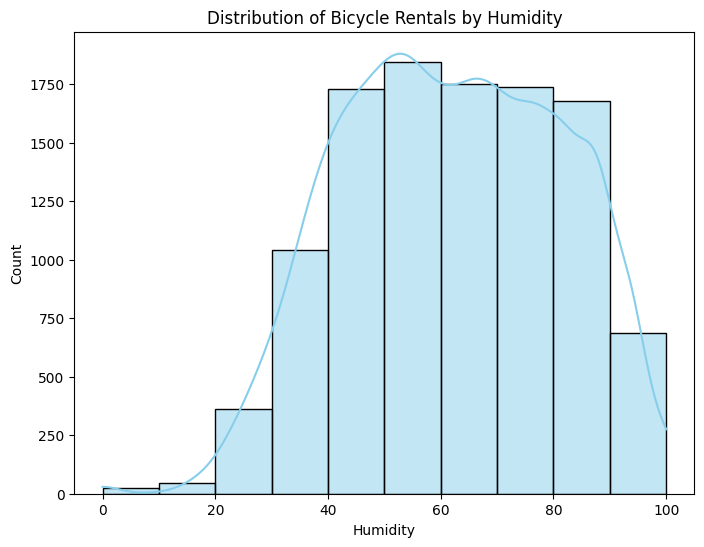

,bin_start,bin_end,count
0,16.0,24.4,64
1,24.4,32.8,291
2,32.8,41.2,592
3,41.2,49.6,751
4,49.6,58.0,791
5,58.0,66.4,969
6,66.4,74.8,822
7,74.8,83.2,1061
8,83.2,91.6,666
9,91.6,100.0,486


Windspeed Graph and DataFrame:


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


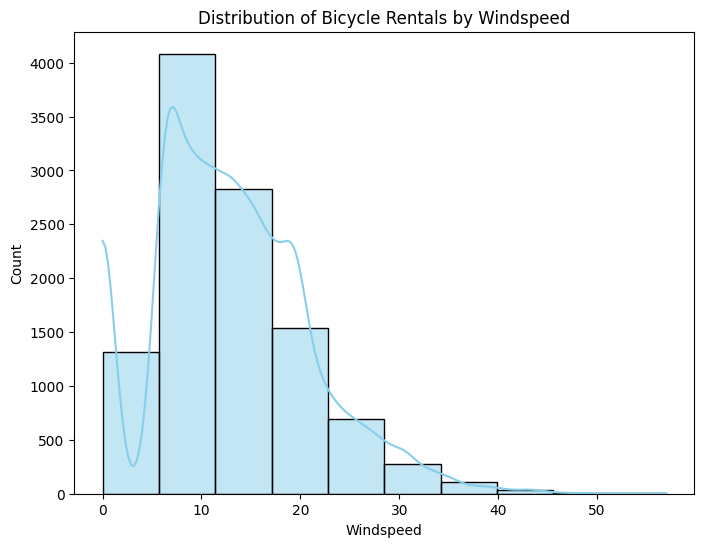

,bin_start,bin_end,count
0,0.00000,5.59986,867
1,5.59986,11.19972,2392
2,11.19972,16.79958,1167
3,16.79958,22.39944,1389
4,22.39944,27.99930,332
5,27.99930,33.59916,263
6,33.59916,39.19902,60
7,39.19902,44.79888,17
8,44.79888,50.39874,3
9,50.39874,55.99860,3


In [16]:
# 그래프 변수 목록
features = ['temp', 'atemp', 'humidity', 'windspeed']
titles = [
    'Distribution of Bicycle Rentals by Real Temperature',
    'Distribution of Bicycle Rentals by Sensory temperature',
    'Distribution of Bicycle Rentals by Humidity',
    'Distribution of Bicycle Rentals by Windspeed'
]

# for문을 통한 그래프 배치
for i, col in enumerate(features):
    print(f"{col.capitalize()} Graph and DataFrame:")
    
    # 그래프 출력 (히스토그램 + KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[col], bins=10, kde=True, color='skyblue')
    plt.title(titles[i])
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

    # 히스토그램의 bin값과 count 추출
    hist_values, bin_edges = np.histogram(df[col], bins=10)

    # 데이터프레임 만들기 (히스토그램 빈 값과 KDE 밀도 값)
    hist_df = pd.DataFrame({
        'bin_start': bin_edges[:-1],  # bin 시작 값
        'bin_end': bin_edges[1:],     # bin 끝 값
        'count': hist_values          # 히스토그램 빈별 카운트
    })
    
    display(hist_df)

- 실제 온도의 경우 약 8 ~ 32도 사이 구간에 많은 대여량이 포착됨.
- 체감 온도의 경우 약 9 ~ 36도 사이 구간에 많은 대여량이 포착됨.
- 습도의 경우 30 ~ 90% 사이에 많은 대여량이 포착됨.
- 풍속의 경우 0 ~ 22.5m/s 내에 많은 대여량이 포착됨.

## 범주형 변수 간 상관관계 분석

---

범주형 변수는 다음과 같다.

- season
- holiday
- workingday
- waether
- datetime을 year, month,  day, hour로 구분한 column

이 변수들을 사용하여 카이제곱 검정을 실시하였다.

In [17]:
def chi_square_test(df, cols):
    results = []

    for col1, col2 in itertools.combinations(cols, 2):
        contigency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2 Statistic': chi2,
            'p-value': p
        })

    return pd.DataFrame(results)

In [18]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
for i, df in enumerate(df_lst):
    if i == 0:
        print('train_df')
    else:
        print('test_df')
    # 카이제곱 검정 실행
    chi_square_results = chi_square_test(df, categorical_cols)

    # 유의한 관계가 있는 변수만 출력
    display(chi_square_results[chi_square_results['p-value'] < 0.05])

train_df


,Variable 1,Variable 2,Chi2 Statistic,p-value
0,season,holiday,20.823388,1.145516e-04
2,season,weather,49.158656,1.549925e-07
4,season,month,32658.000000,0.000000e+00
7,holiday,workingday,679.830361,7.274718e-150
10,holiday,month,341.279082,1.695226e-66
11,holiday,day,292.159124,1.967560e-51
13,workingday,weather,16.162519,1.050217e-03
15,workingday,month,64.723871,1.214468e-09
16,workingday,day,95.196217,1.665054e-12
18,weather,year,13.414695,3.820469e-03


test_df


,Variable 1,Variable 2,Chi2 Statistic,p-value
0,season,holiday,105.083854,1.253472e-22
1,season,workingday,52.195517,2.721058e-11
2,season,weather,173.617925,1.087270e-32
4,season,month,17581.734489,0.000000e+00
5,season,day,79.937217,9.047547e-06
7,holiday,workingday,421.654275,1.065063e-93
10,holiday,month,410.636832,3.372796e-81
11,holiday,day,86.432986,8.306194e-14
13,workingday,weather,33.275090,2.817826e-07
15,workingday,month,85.398959,1.321284e-13


train_df에서 강한 연관성이 있는 변수

- `season` -> `holiday`, `waether`, `month`
- `holiday` -> `workingday`, `month`, `day`
- `workingday` ->  `weather`, `month`, `day`
- `weather` -> `year`, `month`, `day`, `hour`

test_df에서  강한 연관성이 있는 변수

- `season` -> `holiday`, `workingday`, `weather`, `month`, `day`
- `holiday` ->`workingday`, `month`, `day`
- `workingday` -> `weather`, `month`, `day`
- `weather` -> `month`, `day`, `hour`
- `month` -> `day`

선형 회귀 시, 다중공선성을 위해 train_df와 test_df내에 공통적으로 추가 작업을 진행할 컬럼은 다음과 같이 정리할 수 있다.

- `season` → `holiday`, `weather`, `month`
- `holiday` → `workingday`, `month`, `day`
- `workingday` → `weather`, `month`, `day`
- `weather` → `month`, `day`, `hour`

## 연속형 변수 간  상관관계 분석

---

연속형 변수는 다음과 같다.

- temp
- atemp
- humidity
- windspeed

이 변수들을 사용하여 `corr()`를 분석하였다.

`count` 의 경우, 종속변수이기 때문에 상관분석에 포함시키지 않았다.

############ train_df ############


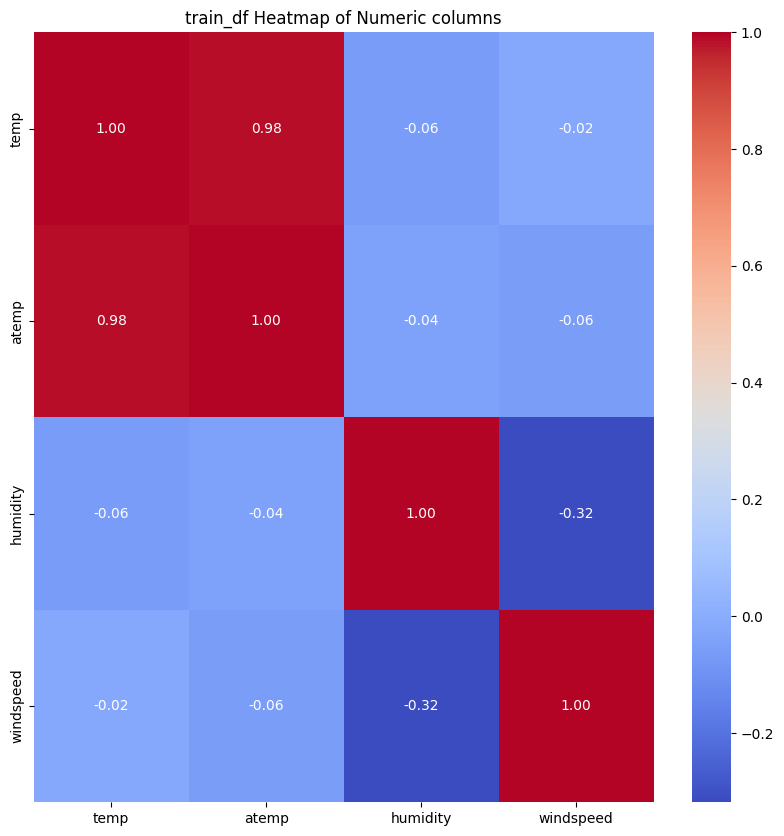



############ test_df ############


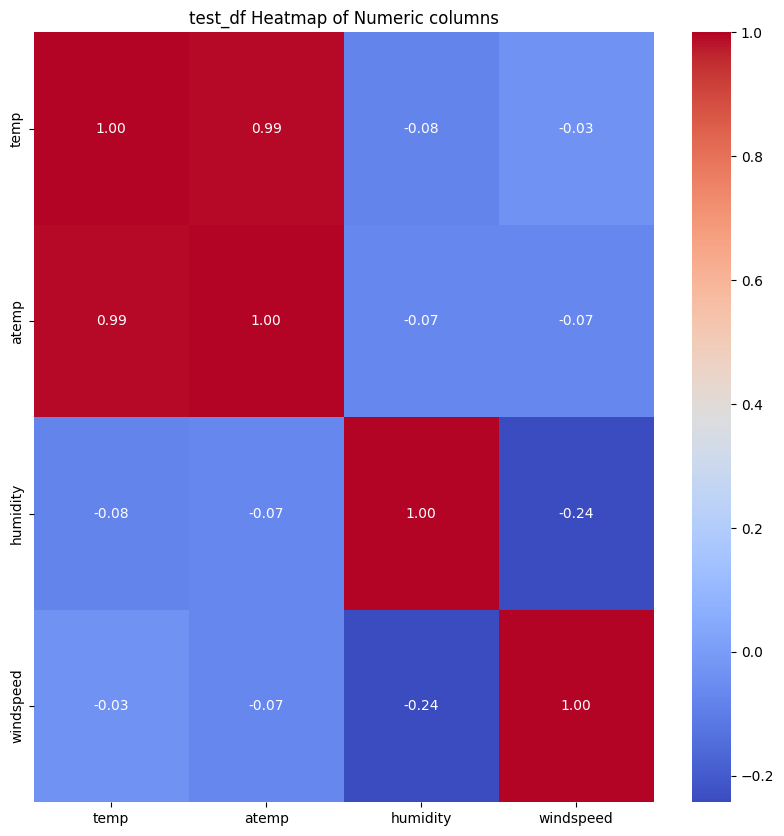

In [19]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed']

for i, df in enumerate(df_lst):
    if i == 0:
        print('############ train_df ############')
        title = 'train_df Heatmap of Numeric columns'
    else:
        print('############ test_df ############')
        title = 'test_df Heatmap of Numeric columns'
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(data=df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

    print('\n')

train_df와 test_df 둘 다 temp와 atemp 사이의 강한 연관을 가지고 있음을 나타낸다.

선형 회귀 시, 다중공선성을 위해 temp 컬럼과 atemp 컬럼을 다음과 같은 방법으로 처리할 수 있다.

- `temp`, `atemp` 컬럼 둘 중 하나를 삭제
- `temp`, `atemp` 컬럼 사이를 뺀 값인 `temp_diff`라는 새로운 변수 추가 후 `temp`, `atemp` 컬럼 삭제

## 범주형-연속형 변수 간 연관성 분석

---

In [20]:
# 범주형 변수와 연속형 변수 리스트
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed']

# 각 범주형 변수별로 ANOVA 수행
for i, df in enumerate(df_lst):
    if i == 0:
        print('############ train_df ############')
    else:
        print('############ test_df ############')

    # ANOVA 결과 저장할 리스트
    anova_results = []
        
    for cat_col in categorical_cols:
        for num_col in numeric_cols:
            model = ols(f"{num_col} ~ C({cat_col})", data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)

            # 결과 저장 (iloc 사용하여 FutureWarning 방지)
            f_stat = anova_table["F"].iloc[0]  
            p_value = anova_table["PR(>F)"].iloc[0]  

            anova_results.append({
                "categorical Variable": cat_col,
                "numeric Variable": num_col,
                "f-statistic": f_stat,
                "p-value": p_value,
            })

    # 결과를 DataFrame으로 변환
    anova_df = pd.DataFrame(anova_results)

    # 데이터 출력
    display(anova_df[anova_df['p-value'] < 0.05])
    print('\n')

############ train_df ############


,categorical Variable,numeric Variable,f-statistic,p-value
0,season,temp,6040.687453,0.000000e+00
1,season,atemp,5361.825789,0.000000e+00
2,season,humidity,140.898799,1.439441e-89
3,season,windspeed,92.605594,3.548098e-59
8,workingday,temp,9.781897,1.767031e-03
9,workingday,atemp,6.622935,1.008049e-02
12,weather,temp,13.161459,1.417741e-08
13,weather,atemp,12.285553,5.081947e-08
14,weather,humidity,717.041823,0.000000e+00
15,weather,windspeed,12.972593,1.867292e-08




############ test_df ############


,categorical Variable,numeric Variable,f-statistic,p-value
0,season,temp,3441.968407,0.000000e+00
1,season,atemp,3267.590270,0.000000e+00
2,season,humidity,39.363540,3.351976e-25
3,season,windspeed,62.247336,1.137033e-39
4,holiday,temp,33.684692,6.786683e-09
5,holiday,atemp,34.177581,5.274847e-09
6,holiday,humidity,6.492755,1.085434e-02
8,workingday,temp,61.038716,6.484148e-15
9,workingday,atemp,69.878234,7.643663e-17
10,workingday,humidity,23.138684,1.541301e-06


- 대부분의 범주형 변수가 연속형 변수들 간의 강한 상관관계를 가지고 있음.
- train_df와 test_df의 상관관계의 유사도가 매우 비슷함.

## EDA 분석 종합 인사이트

---

- **미등록 사용자보다 등록된 사용자의 대여량이 가장 많은 수치를 기록함.**
- **계절이 여름과 가을일 때 많은 대여량을 보임.**
- **습도가 30~90%에서 많은 대여량을 보이는데, 실내에서 생활할 때 필요한 적정 습도 기준은 실내 온도 24℃에서 최소 40%, 15℃에서 최대 70%라고 기준을 두고 있는 것으로 보아, 이용객들은 실내 적정 습도 범위 내에서 많은 대여량을 보이고 있음.**
    - [이에 대한 링크](https://www.inha.com/page/health/medicine/148039)
- **데이터 분포의 패턴 경우, 학습 데이터와 검증 데이터 둘 다 비슷한 패턴과 데이터간 연관 추세를 보이고 있음.**
    - 어느 한 지역에서만 추출한 데이터로 추측이 가능함.
    - 그 지역의 지리적인 특성을 가지고 있기 때문에 비슷한 추세를 보일 수 있을 것임.
- **위의 내용으로 인해 과적합의 위험은 감소하지만, 모델의 일반화 성능의 평가가 어렵다.**
    - 차후 전국 단위의 데이터를 추출할 시, 지역 데이터를 추가하여 머신러닝 모델을 다시 학습시켜 일반화 성능을 향상 시킬 수 있음.

# 선형 회귀 머신러닝 모델 전처리

---

선형 회귀를 진행하기 전, 다음과 같은 절차를 진행하였다.

1. 범주형 데이터 One-Hot Encoding 진행
    1. 다중공선성이 해결되지 않으면 해당 컬럼을 삭제
2. 연속형 데이터 간 VIF 계산 후, 파생 변수인 `temp_diff` (`temp` - `atemp`) 생성
    1. 다중공선성이 해결되지 않으면 PCA 진행 후 다시 VIF값 확인
3. 범주형 - 연속형 간 ANOVA 분석 다시 실행


## 왜 One-Hot Encoding을 진행했는가?

범주형 변수들을 가진 컬럼들은 현재 라벨링된 수치값을 가지고 있는데, 선형 모델에서 라벨링된 수치값을 수치적인 관계로 잘못 해석할 수 있다.

→ 특히 순서형 데이터인 시간 데이터를 예로 들면, 1월과 2월이 각각 0과 1로 인코딩될 수 있지만, 이 인코딩은 단순히 숫자로 변환된 범주에 불과하며, 실제로 1월과 2월 간의 수치적인 차이는 존재하지 않음. 즉, 1월과 2월은 “**시간적으로 연속적인 순서”** 에 있지만, 이를 숫자 차이로 해석하면 **“의미 없는 관계”** 가 발생할 수 있음.

## VIF(다중공선성)의 중요성

- 회귀분석 결과에서 각 변수의 회귀계수 추정이 부정확해질 수 있음.
- 구조방정식을 이용한 매개모형등을 분석시 분산을 크게 추정하여 2종 오류를 발생시킬 수 있음.
- 불안정한 추정치로 해석의 문제를 일으킬 수 있음.

## One-Hot Encoding

---

선형 모델을 적용하기 위해 범주형 변수들을 One-Hot Encoding을 진행하고, 연속형 변수의 VIF값을 계산하고 다시 한 번 전처리를 진행한 뒤, 선형 회귀를 진행하였다.

In [21]:
# train_df.copy()를 통해 원본 유지
train_original = train_df.copy()

# train_df와 test_df의 컬럼을 맞춰주기 위해 train_df의 casual, registered 컬럼 삭제
# train_df에서 feature와 target을 분리
train_feature_df = train_df.drop(labels=['casual', 'registered', 'count'], axis=1)
train_target_df = train_df['count']

# df_lst 초기화 후 다시 생성
df_lst = []
df_lst = [train_feature_df, test_df]

In [22]:
# 범주형 데이터와 연속형 데이터가 들어있는 컬럼들을 지정
# 순서형인 year, month, day, hour 데이터는 원핫 인코딩을 진행하지 않음
# holiday와 workingday는 이미 0과 1의 범주를 갖고 있기 때문에 진행하지 않음.
one_hot_cols = ['season', 'weather']

In [23]:
# train_df와 test_df를 똑같이 One Hot Encoding
# 다중공산성을 방지하기 위해 drop_first=True 적용
for i, df in enumerate(df_lst):
    if i == 0:
        train_df_oh = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)
    else:
        test_df_oh = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)

oh_df_lst = [train_df_oh, test_df_oh]

for df in oh_df_lst:
    display(df)

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,2011,1,1,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0000,2011,1,1,1,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0000,2011,1,1,2,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0000,2011,1,1,3,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0000,2011,1,1,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,2012,12,19,19,0,0,1,0,0,0
10882,0,1,14.76,17.425,57,15.0013,2012,12,19,20,0,0,1,0,0,0
10883,0,1,13.94,15.910,61,15.0013,2012,12,19,21,0,0,1,0,0,0
10884,0,1,13.94,17.425,61,6.0032,2012,12,19,22,0,0,1,0,0,0


,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,0,0,0,0
1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,0,0,0,0
2,0,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,0,0,0,0
3,0,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,0,0,0,0
4,0,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0,1,0,0
6489,0,1,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0,1,0,0
6490,0,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0,0,0,0
6491,0,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0,0,0,0


One-Hot Encoding을 진행하면 해당 명목형 데이터는 이산형 데이터로 변환된다. 이에 다중공선성이 해소되었는지, Point-biserial, 피어슨 상관계수를 통하여 상관계수를 관찰하였다.

### Point-biserial, 피어슨 상관계수

---

train_df
season_2와 year의 상관관계: -0.002445653307463642, p-value: 0.7986143893202875
season_2와 month의 상관관계: -0.25558068978870907, p-value: 6.598527213971551e-162
season_2와 day의 상관관계: 0.0010187612863879413, p-value: 0.915359172081347
season_2와 hour의 상관관계: -0.0027333826870574772, p-value: 0.7755231054746917


season_3와 year의 상관관계: -0.0015982606693244307, p-value: 0.8675769316049323
season_3와 month의 상관관계: 0.24835385165751317, p-value: 1.0538394415343655e-152
season_3와 day의 상관관계: 0.0009413935787771295, p-value: 0.9217655585442731
season_3와 hour의 상관관계: -0.0026108486921049704, p-value: 0.7853339385590723


season_4와 year의 상관관계: -0.0022343508137858585, p-value: 0.8156862880563354
season_4와 month의 상관관계: 0.753087366528734, p-value: 0.0
season_4와 day의 상관관계: 0.0005160962705113262, p-value: 0.9570616536444115
season_4와 hour의 상관관계: -0.0029640482767389763, p-value: 0.7571525878032963


weather_2와 year의 상관관계: 0.019063712453403804, p-value: 0.04670299689540038
weather_2와 month의 상관관계: 0.019028986809498608

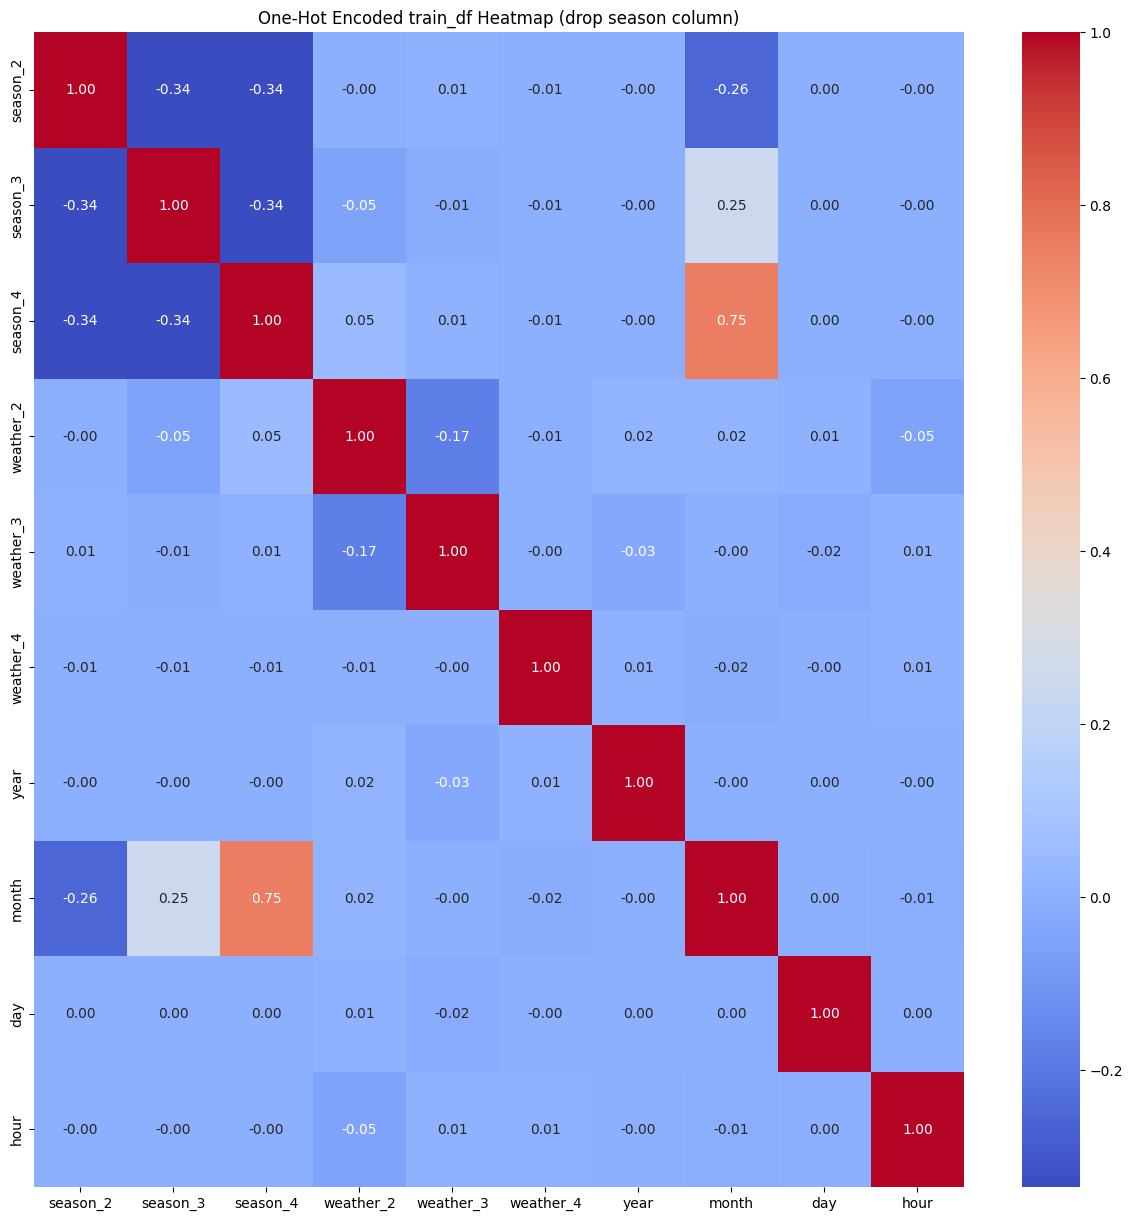

test_df
season_2와 year의 상관관계: -0.002862032541963869, p-value: 0.8176440355210803
season_2와 month의 상관관계: -0.4260307105582901, p-value: 1.1599334103980613e-284
season_2와 day의 상관관계: 0.021148924160245344, p-value: 0.0883764404737662
season_2와 hour의 상관관계: -0.003248345655766574, p-value: 0.793553327331062


season_3와 year의 상관관계: 8.256200004266943e-05, p-value: 0.9946929137874317
season_3와 month의 상관관계: 0.11489724576253288, p-value: 1.582355301373094e-20
season_3와 day의 상관관계: -0.01958820635439641, p-value: 0.11450850732797194
season_3와 hour의 상관관계: -0.004614863885120857, p-value: 0.7100475639646281


season_4와 year의 상관관계: -0.017125207982822327, p-value: 0.16765739357723103
season_4와 month의 상관관계: 0.5739189655549393, p-value: 0.0
season_4와 day의 상관관계: 0.0135346066518231, p-value: 0.2755162377643351
season_4와 hour의 상관관계: -0.00026128913495892733, p-value: 0.983205447951887


weather_2와 year의 상관관계: -0.0022302006340843093, p-value: 0.8574090530974752
weather_2와 month의 상관관계: 0.005580666272897907, p-valu

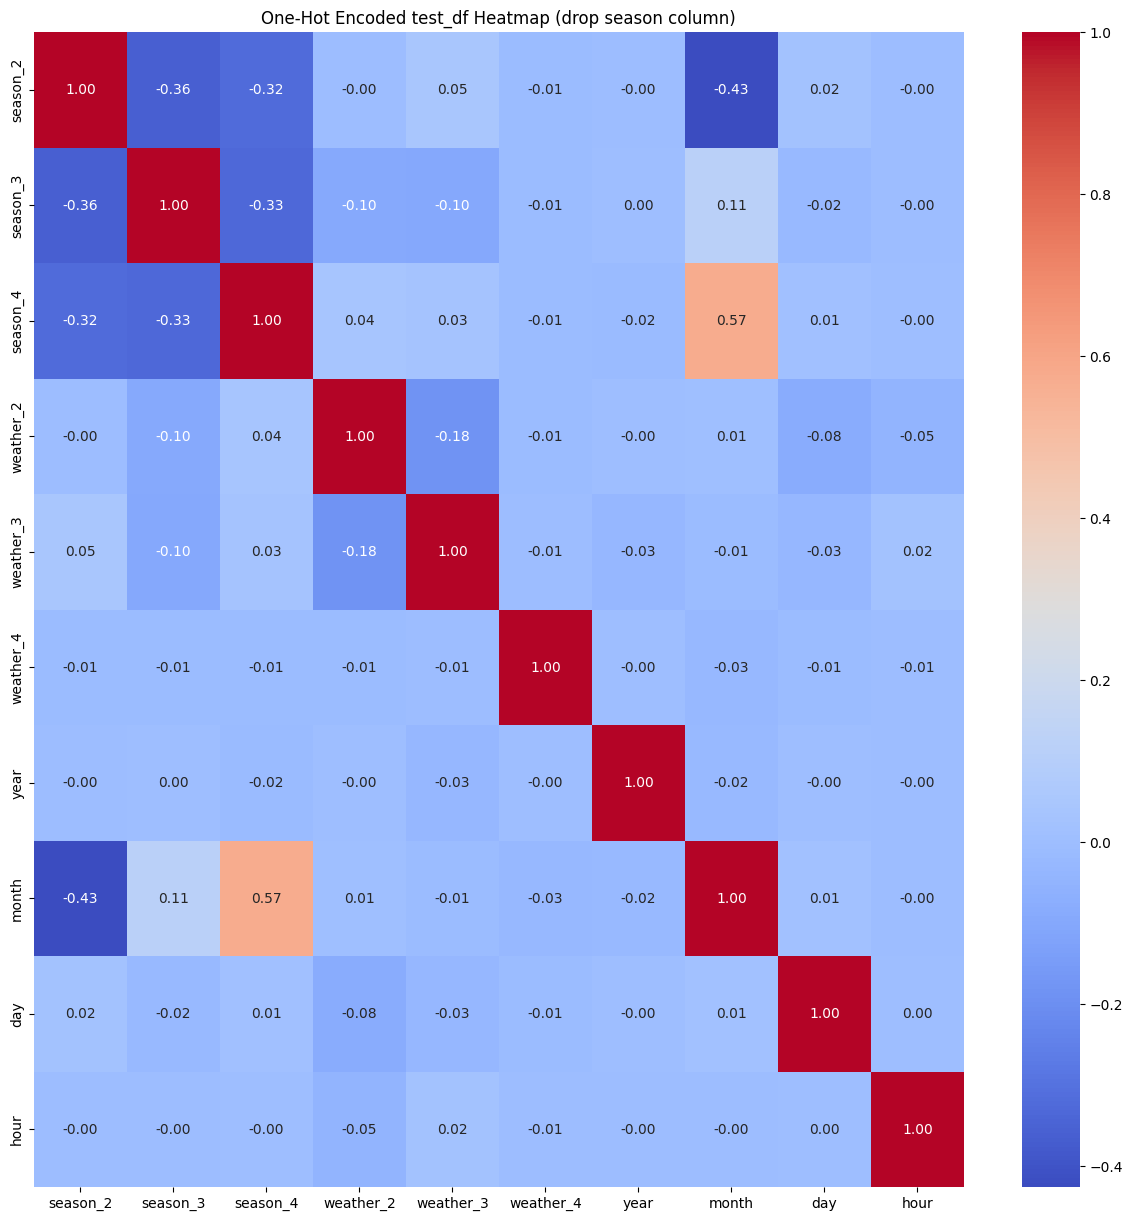

In [24]:
for i, df in enumerate(oh_df_lst):
    # 필터링할 컬럼명  리스트
    filtered_cols = ['holiday', 'workingday' ,'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

    # One-Hot Encoding한 데이터 컬럼만 추출
    oh_cols = df.loc[:, ~df.columns.isin(filtered_cols)].columns

    # 순서형 데이터가 담긴 컬럼 리스트
    ordinal_cols = ['year', 'month', 'day', 'hour']

    # One-Hot Encoding한 데이터 컬럼과 순서형 데이터를 담은 컬럼 병합
    combined_cols = oh_cols.tolist() + ordinal_cols
    
    if i == 0:
        print('train_df')
        title = 'One-Hot Encoded train_df Heatmap (drop season column)'
    else:
        print('test_df')
        title = 'One-Hot Encoded test_df Heatmap (drop season column)'

    # Point-biserial
    for col_1 in oh_cols:  
        for col_2 in ordinal_cols:
            correlation, p_value = stats.pointbiserialr(df[col_1], df[col_2])
            print(f"{col_1}와 {col_2}의 상관관계: {correlation}, p-value: {p_value}")
        print('\n')

    # 피어슨 상관계수
    plt.figure(figsize=(15, 15))
    sns.heatmap(data=df[combined_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

- One-Hot Encoding을 실행하여도 `season` 과 `month` 간의 상관관계가 있다는 것을 확인.
- `season` 컬럼을 삭제하는 것이 다중공선성이 해결될 것으로 보임.

train_df
weather_2와 year의 상관관계: 0.019063712453403804, p-value: 0.04670299689540038
weather_2와 month의 상관관계: 0.019028986809498608, p-value: 0.047104428162660715
weather_2와 day의 상관관계: 0.012006226779975782, p-value: 0.21035753421846132
weather_2와 hour의 상관관계: -0.050671178740110824, p-value: 1.2257159873029695e-07


weather_3와 year의 상관관계: -0.03077350855244277, p-value: 0.0013219275069731168
weather_3와 month의 상관관계: -0.00039222083840667957, p-value: 0.9673612244691434
weather_3와 day의 상관관계: -0.018952567446431826, p-value: 0.04799807046697742
weather_3와 hour의 상관관계: 0.014030186270027608, p-value: 0.143260247220711


weather_4와 year의 상관관계: 0.009547951286946283, p-value: 0.31919995092479686
weather_4와 month의 상관관계: -0.015365695244841748, p-value: 0.1089113315688008
weather_4와 day의 상관관계: -0.0017372026968217609, p-value: 0.8561854026350056
weather_4와 hour의 상관관계: 0.008951276692597933, p-value: 0.3503803311343193




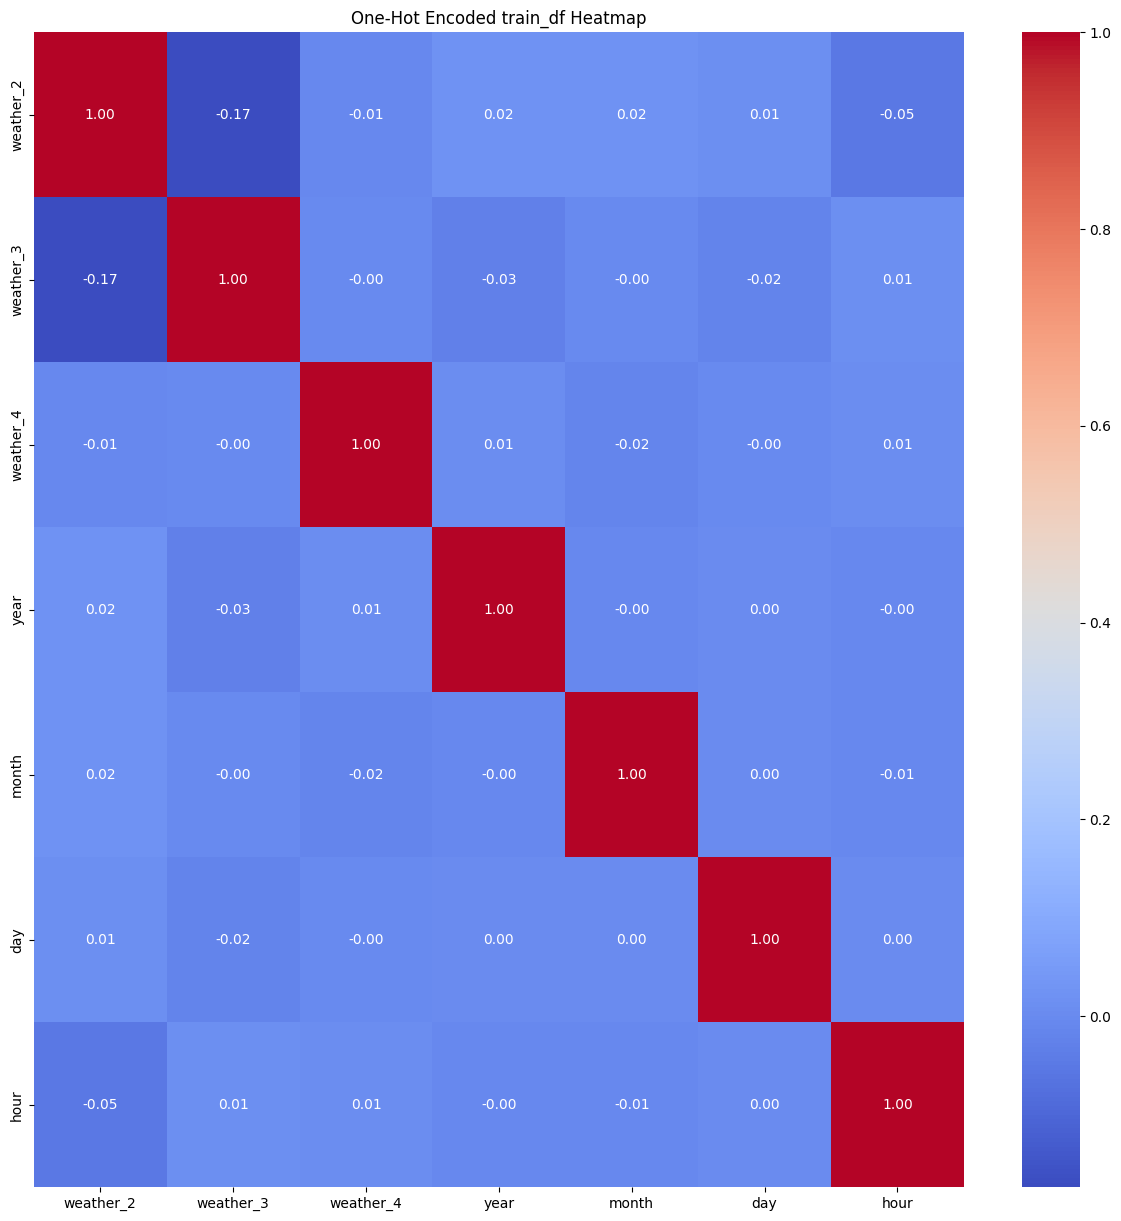

test_df
weather_2와 year의 상관관계: -0.0022302006340843093, p-value: 0.8574090530974752
weather_2와 month의 상관관계: 0.005580666272897907, p-value: 0.6529972389102396
weather_2와 day의 상관관계: -0.08314281656018621, p-value: 1.947478760155511e-11
weather_2와 hour의 상관관계: -0.05036946969945369, p-value: 4.896244860930973e-05


weather_3와 year의 상관관계: -0.032947252918289704, p-value: 0.007929162816148283
weather_3와 month의 상관관계: -0.00854941890024848, p-value: 0.49095864604945744
weather_3와 day의 상관관계: -0.033968248530577984, p-value: 0.006192776566156216
weather_3와 hour의 상관관계: 0.021668011471240013, p-value: 0.0808354873652829


weather_4와 year의 상관관계: -0.00012706414732974614, p-value: 0.9918323977052093
weather_4와 month의 상관관계: -0.028486383963892237, p-value: 0.021708347326628737
weather_4와 day의 상관관계: -0.009065639752124975, p-value: 0.4651604206531427
weather_4와 hour의 상관관계: -0.007759241783048502, p-value: 0.5318908799091744




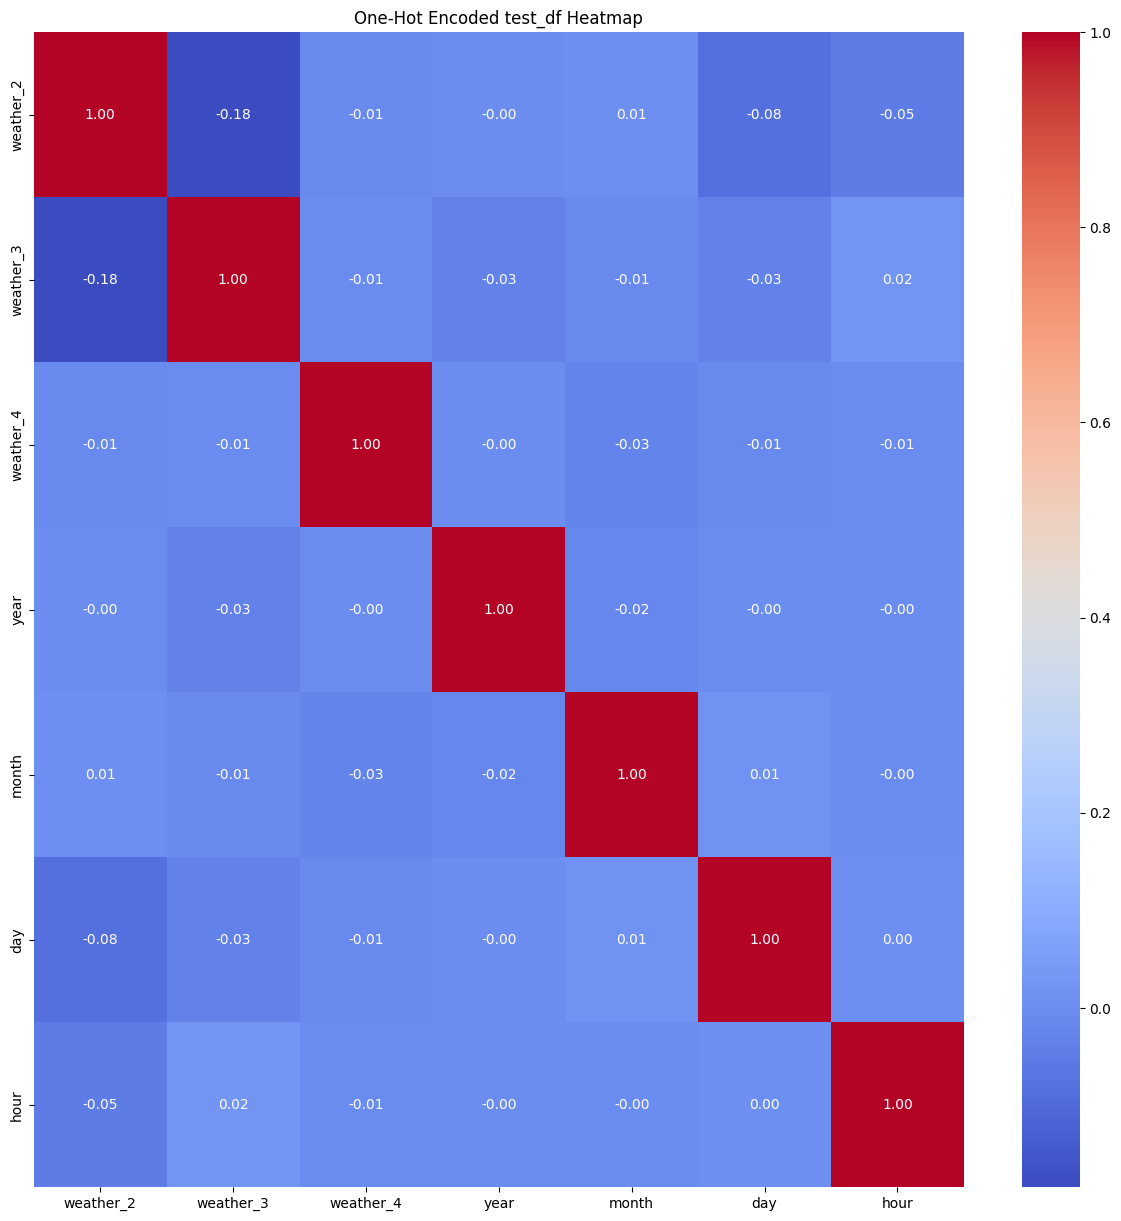

In [25]:
for i, df in enumerate(oh_df_lst):
    # 계절 컬럼 제거
    df.drop(labels=['season_2', 'season_3', 'season_4'], axis=1, inplace=True)

    # 제거한 데이터프레임의 상관계수 다시 체크
    # 필터링할 컬럼명  리스트
    filtered_cols = ['holiday', 'workingday' ,'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']

    # One-Hot Encoding한 데이터 컬럼만 추출
    oh_cols = df.loc[:, ~df.columns.isin(filtered_cols)].columns

    # 순서형 데이터가 담긴 컬럼 리스트
    ordinal_cols = ['year', 'month', 'day', 'hour']

    # One-Hot Encoding한 데이터 컬럼과 순서형 데이터를 담은 컬럼 병합
    combined_cols = oh_cols.tolist() + ordinal_cols
    
    if i == 0:
        print('train_df')
        title = 'One-Hot Encoded train_df Heatmap'
    else:
        print('test_df')
        title = 'One-Hot Encoded test_df Heatmap'

    # Point-biserial
    for col_1 in oh_cols:  
        for col_2 in ordinal_cols:
            correlation, p_value = stats.pointbiserialr(df[col_1], df[col_2])
            print(f"{col_1}와 {col_2}의 상관관계: {correlation}, p-value: {p_value}")
        print('\n')

    # 피어슨 상관계수
    plt.figure(figsize=(15, 15))
    sns.heatmap(data=df[combined_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

다중공선성이 많이 해결된 것을 볼 수 있다.

## 선형 모델을 시작하기 전 연속형 데이터 전처리

---

EDA를 진행하며 확인한 기존 연속형 데이터인 `temp` , `atemp`, `humidity`, `windspeed`간의 상관관계를 관찰했고, 그 결과  `temp` , `atemp` 간의 상관관계가 매우 큰 것을 확인할 수 있었다. 

다중공선성을 줄이기 위해 `temp` , `atemp` 의 차이인 `temp_diff` 라는 파생 변수를 생성하고 두 컬럼을 삭제한 다음, One-Hot Encoding되어 이산형 데이터로 만들어진 범주형 데이터까지 합산하여 피어슨 상관계수와 VIF 값을 같이 확인하였다.

train_df


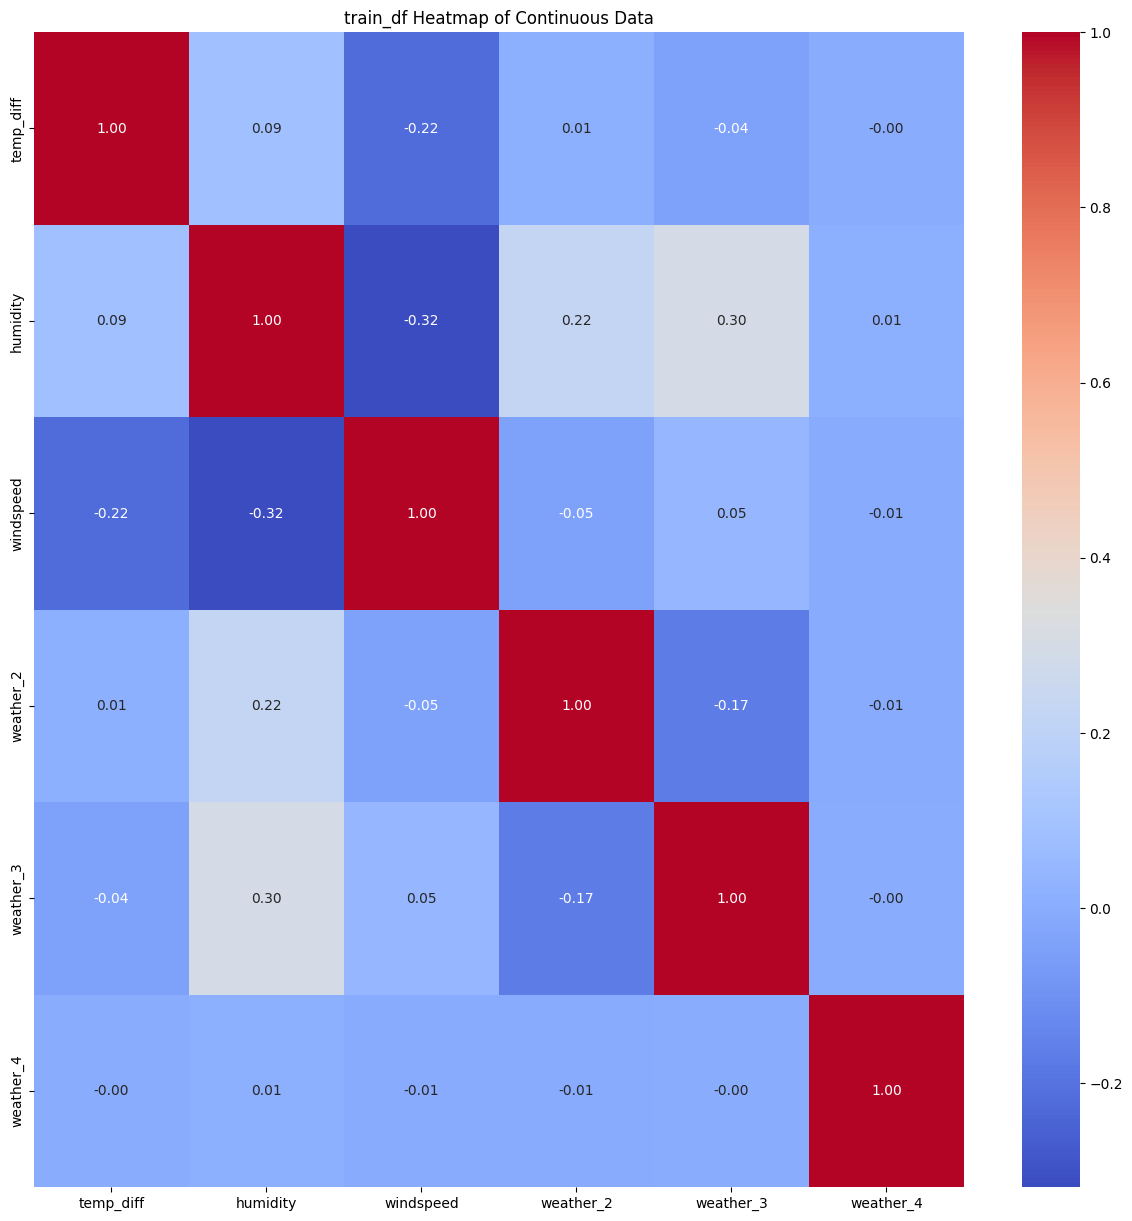

,column,vif
0,temp_diff,4.677462
1,humidity,6.340641
2,windspeed,2.391240
3,weather_2,1.517309
4,weather_3,1.251026
5,weather_4,1.000403


test_df


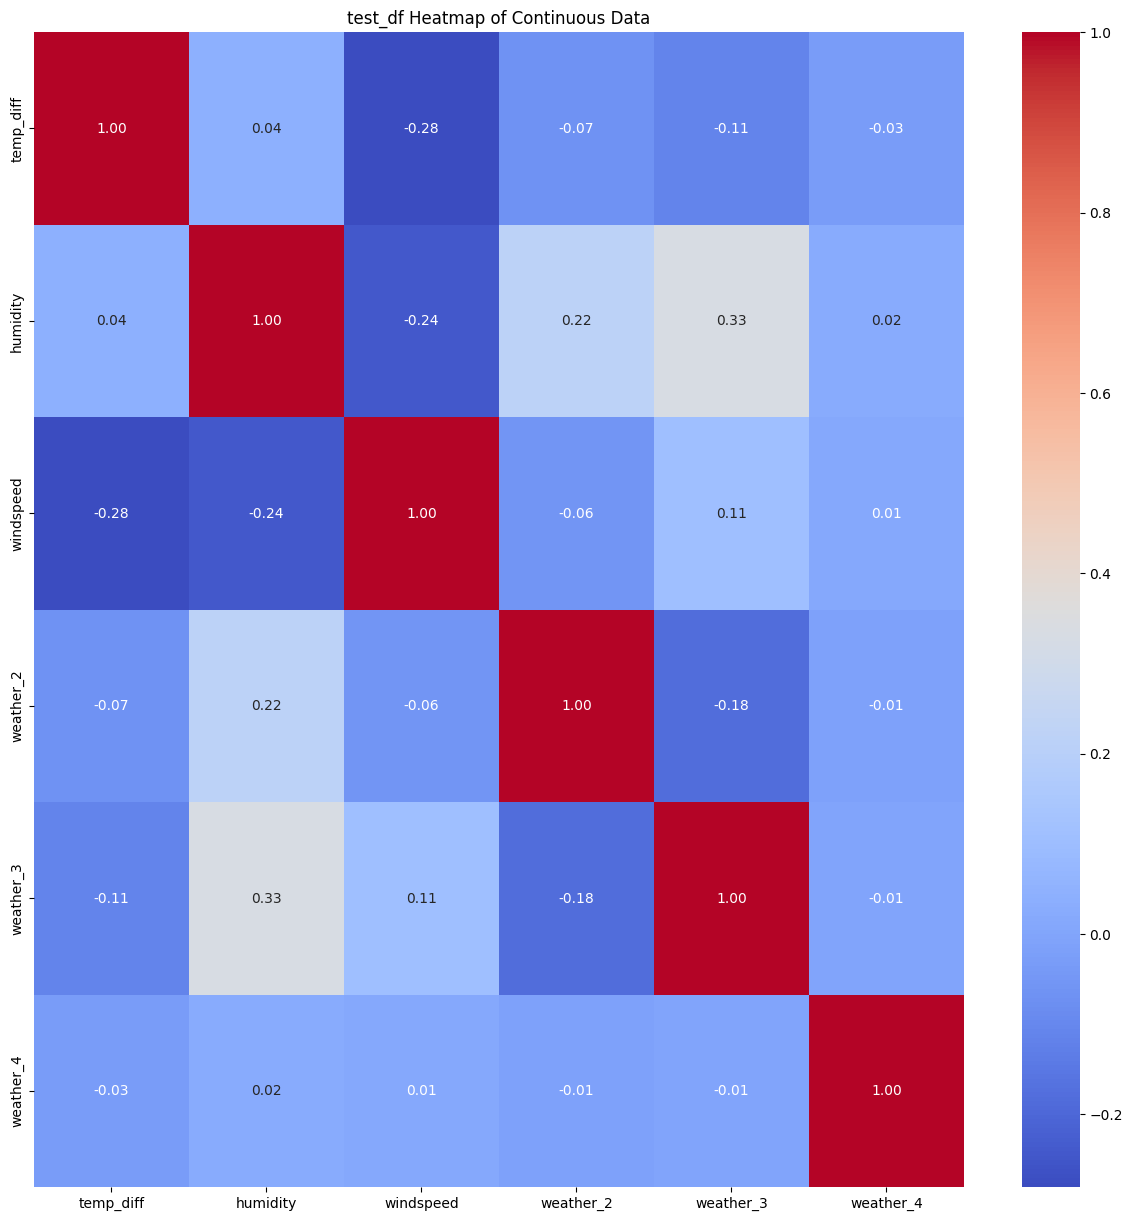

,column,vif
0,temp_diff,5.872320
1,humidity,8.124797
2,windspeed,2.462594
3,weather_2,1.569522
4,weather_3,1.356557
5,weather_4,1.003112


In [26]:
# 기존의 One-Hot Encoding된 데이터프레임을 사용하여 전처리
for i, df in enumerate(oh_df_lst):
    # 파생 변수 생성
    df['temp_diff'] = df['atemp'] - df['temp']

    # 기존 데이터 drop 처리
    df.drop(labels=['temp', 'atemp'], axis=1, inplace=True)

    # 상관계수 확인을 위한 컬럼 필터링
    filtered_cols = ['temp_diff', 'humidity', 'windspeed', 'weather_2', 'weather_3', 'weather_4']
    
    if i == 0:
        print('train_df')
        title = 'train_df Heatmap of Continuous Data'

    else:
        print('test_df')
        title = 'test_df Heatmap of Continuous Data'

    # 피어슨 상관계수
    plt.figure(figsize=(15, 15))
    sns.heatmap(data=df[filtered_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data['column'] = filtered_cols
    vif_data['vif'] = [VIF(df[filtered_cols], i) for i in range(df[filtered_cols].shape[1])]

    display(vif_data)

- 파생 변수를 통해 피어슨 상관계수의 값이 많이 떨어진 것을 확인할 수 있음
- VIF값이 10 미만으로 다중공선성이 많이 줄어들었지만, VIF값이 5 이상 존재하는 데이터가 존재하여 모델링 시 유의할 컬럼으로 지정.

## 연속형 데이테를 다양한 스케일러 적용 후 데이터 분포 시각화

---

스케일러는 연속형 변수에만 적용하는 것이 원칙이고, 현재 종속변수는 `count` 이므로 포함시키지 않고, 독립 변수인 `temp_diff`, `humidity`, `windspeed`에만 적용하였다.

One-Hot Encoding 데이터는 이미 0과 1로 나뉘어져 있는 이산형 값이기 때문에 따로 스케일링을 진행하지 않았다.

스케일링을 하기 전 이상치 처리를 해주어야 하므로, 이상치 처리를 해주었다.

In [27]:
def scaler_func(kind, data_lst, handle_outliers=True):
    numeric_cols = ['temp_diff', 'humidity', 'windspeed']
    
    # 이상치 처리 함수
    def remove_outliers(df, columns):
        df_clean = df.copy()
        
        for col in columns:
            # IQR 계산
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # 이상치 경계값 계산 (일반적으로 1.5 * IQR 사용)
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # 이상치를 경계값으로 대체
            df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
            df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
            
        return df_clean
    
    # 이상치 처리 (옵션에 따라)
    train_data = data_lst[0].copy()
    test_data = data_lst[1].copy()
    
    if handle_outliers:
        train_data = remove_outliers(train_data, numeric_cols)
        # 테스트 데이터도 같은 방식으로 처리
        test_data = remove_outliers(test_data, numeric_cols)
    
    # 스케일러 선택
    if kind == 'SD':
        # StandardScaler 적용
        scaler = StandardScaler()
    elif kind == 'MM':
        # MinMaxScaler 적용
        scaler = MinMaxScaler()
    else:
        # RobustScaler 적용
        scaler = RobustScaler()
    
    # 스케일링된 연속형 데이터 임시 보관 변수 생성
    scaled_train_tmp = scaler.fit_transform(train_data[numeric_cols])
    scaled_test_tmp = scaler.transform(test_data[numeric_cols])
    
    # 원본 데이터와 병합
    scaled_train_df = pd.concat([
        train_data.drop(labels=numeric_cols, axis=1),
        pd.DataFrame(scaled_train_tmp, columns=numeric_cols)
    ], axis=1)
    
    scaled_test_df = pd.concat([
        test_data.drop(labels=numeric_cols, axis=1),
        pd.DataFrame(scaled_test_tmp, columns=numeric_cols)
    ], axis=1)
    
    return scaled_train_df, scaled_test_df

In [28]:
for kind in ['SD', 'MM', 'RB']:
    # 각각의 스케일러 적용
    if kind == 'SD':
        SD_train_df, SD_test_df = scaler_func(kind, oh_df_lst)

    elif kind == 'MM':
        MM_train_df, MM_test_df = scaler_func(kind, oh_df_lst)

    else:
        RB_train_df, RB_test_df = scaler_func(kind, oh_df_lst)

# 스케일링된 데이터 프레임 표시
for i, df in enumerate([SD_train_df, SD_test_df, MM_train_df, MM_test_df, RB_train_df, RB_test_df]):
    if i == 0:
        print('used StandardScaler')
    if i == 2:
        print('used MinMaxScaler')
    if i == 4:
        print('used RobustScaler')
        
    display(df)

used StandardScaler


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,0,2011,1,1,0,0,0,0,0.944786,0.993664,-1.611627
1,0,0,2011,1,1,1,0,0,0,0.997149,0.941665,-1.611627
2,0,0,2011,1,1,2,0,0,0,0.997149,0.941665,-1.611627
3,0,0,2011,1,1,3,0,0,0,0.944786,0.681673,-1.611627
4,0,0,2011,1,1,4,0,0,0,0.944786,0.681673,-1.611627
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2012,12,19,19,0,0,0,0.560792,-0.618287,1.687190
10882,0,1,2012,12,19,20,0,0,0,-0.704641,-0.254298,0.291504
10883,0,1,2012,12,19,21,0,0,0,-1.311176,-0.046305,0.291504
10884,0,1,2012,12,19,22,0,0,0,0.010983,-0.046305,-0.850035


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,1,2011,1,20,0,0,0,0,-2.415158,-0.306297,1.687190
1,0,1,2011,1,20,1,0,0,0,-0.434100,-0.306297,-1.611627
2,0,1,2011,1,20,2,0,0,0,-0.434100,-0.306297,-1.611627
3,0,1,2011,1,20,3,0,0,0,-1.092998,-0.306297,-0.215941
4,0,1,2011,1,20,4,0,0,0,-1.092998,-0.306297,-0.215941
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,2012,12,31,19,1,0,0,-1.092998,-0.098303,-0.215941
6489,0,1,2012,12,31,20,1,0,0,-1.092998,-0.098303,-0.215941
6490,0,1,2012,12,31,21,0,0,0,-1.092998,-0.098303,-0.215941
6491,0,1,2012,12,31,22,0,0,0,-0.434100,-0.306297,-0.470088


used MinMaxScaler


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,0,2011,1,1,0,0,0,0,0.720420,0.806122,0.000000
1,0,0,2011,1,1,1,0,0,0,0.731870,0.795918,0.000000
2,0,0,2011,1,1,2,0,0,0,0.731870,0.795918,0.000000
3,0,0,2011,1,1,3,0,0,0,0.720420,0.744898,0.000000
4,0,0,2011,1,1,4,0,0,0,0.720420,0.744898,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2012,12,19,19,0,0,0,0.636450,0.489796,0.812775
10882,0,1,2012,12,19,20,0,0,0,0.359733,0.561224,0.468901
10883,0,1,2012,12,19,21,0,0,0,0.227099,0.602041,0.468901
10884,0,1,2012,12,19,22,0,0,0,0.516221,0.602041,0.187644


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,1,2011,1,20,0,0,0,0,-0.014313,0.551020,0.812775
1,0,1,2011,1,20,1,0,0,0,0.418893,0.551020,0.000000
2,0,1,2011,1,20,2,0,0,0,0.418893,0.551020,0.000000
3,0,1,2011,1,20,3,0,0,0,0.274809,0.551020,0.343874
4,0,1,2011,1,20,4,0,0,0,0.274809,0.551020,0.343874
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,2012,12,31,19,1,0,0,0.274809,0.591837,0.343874
6489,0,1,2012,12,31,20,1,0,0,0.274809,0.591837,0.343874
6490,0,1,2012,12,31,21,0,0,0,0.274809,0.591837,0.343874
6491,0,1,2012,12,31,22,0,0,0,0.418893,0.551020,0.281257


used RobustScaler


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,0,2011,1,1,0,0,0,0,0.667939,0.633333,-1.300268
1,0,0,2011,1,1,1,0,0,0,0.713740,0.600000,-1.300268
2,0,0,2011,1,1,2,0,0,0,0.713740,0.600000,-1.300268
3,0,0,2011,1,1,3,0,0,0,0.667939,0.433333,-1.300268
4,0,0,2011,1,1,4,0,0,0,0.667939,0.433333,-1.300268
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,2012,12,19,19,0,0,0,0.332061,-0.400000,1.300938
10882,0,1,2012,12,19,20,0,0,0,-0.774809,-0.166667,0.200402
10883,0,1,2012,12,19,21,0,0,0,-1.305344,-0.033333,0.200402
10884,0,1,2012,12,19,22,0,0,0,-0.148855,-0.033333,-0.699732


,holiday,workingday,year,month,day,hour,weather_2,weather_3,weather_4,temp_diff,humidity,windspeed
0,0,1,2011,1,20,0,0,0,0,-2.270992,-0.200000,1.300938
1,0,1,2011,1,20,1,0,0,0,-0.538168,-0.200000,-1.300268
2,0,1,2011,1,20,2,0,0,0,-0.538168,-0.200000,-1.300268
3,0,1,2011,1,20,3,0,0,0,-1.114504,-0.200000,-0.199732
4,0,1,2011,1,20,4,0,0,0,-1.114504,-0.200000,-0.199732
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,2012,12,31,19,1,0,0,-1.114504,-0.066667,-0.199732
6489,0,1,2012,12,31,20,1,0,0,-1.114504,-0.066667,-0.199732
6490,0,1,2012,12,31,21,0,0,0,-1.114504,-0.066667,-0.199732
6491,0,1,2012,12,31,22,0,0,0,-0.538168,-0.200000,-0.400134


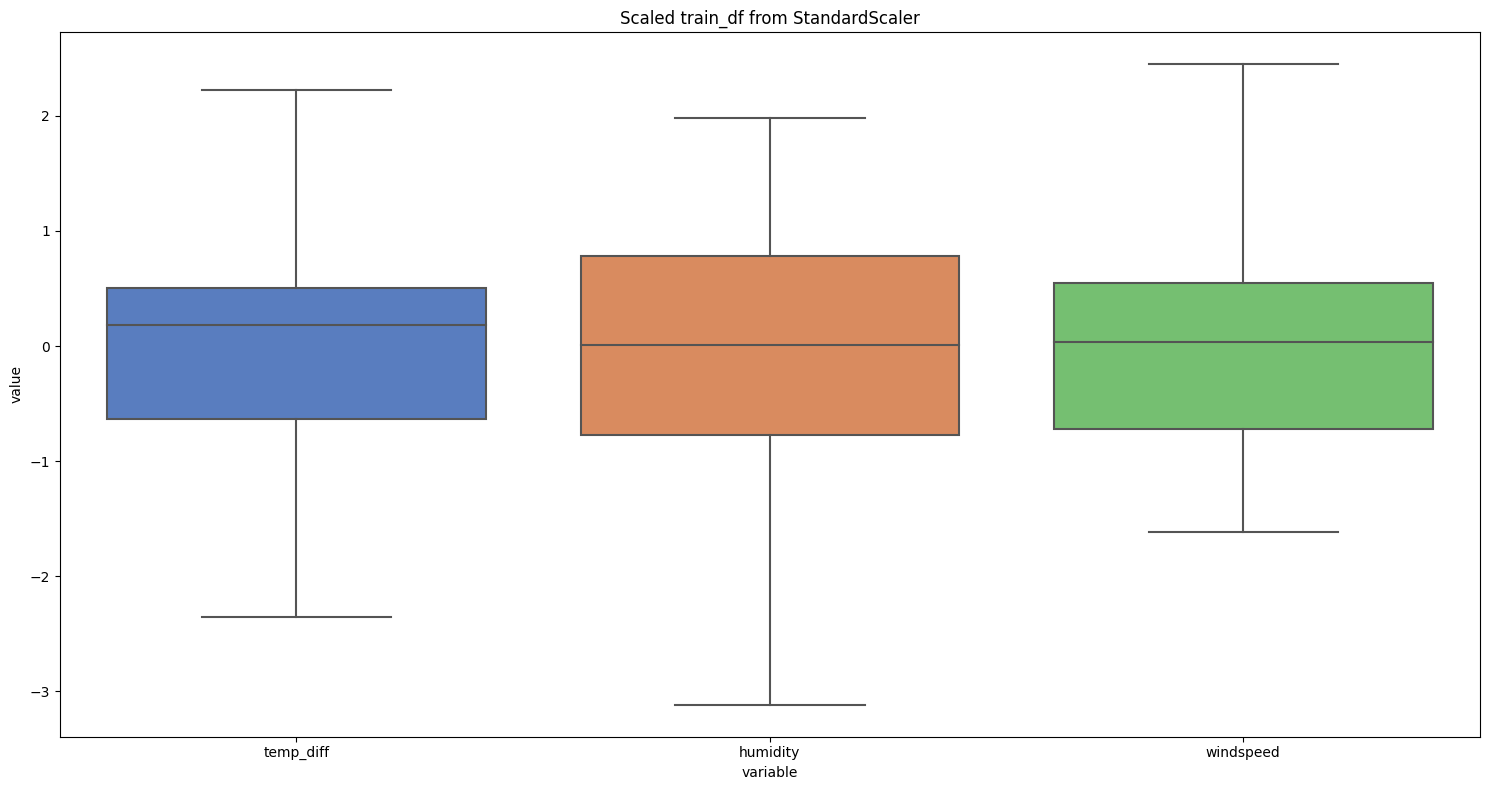

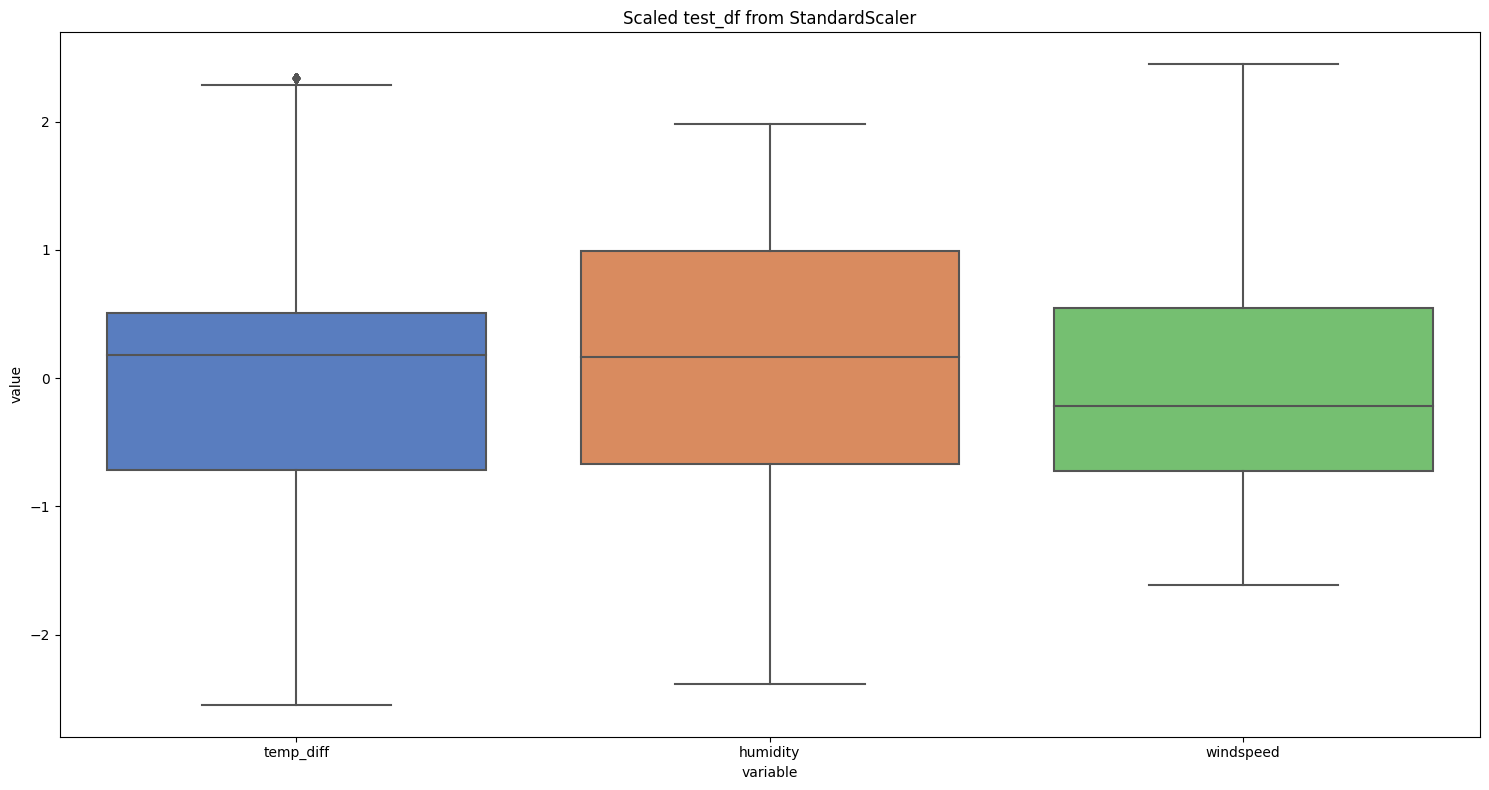

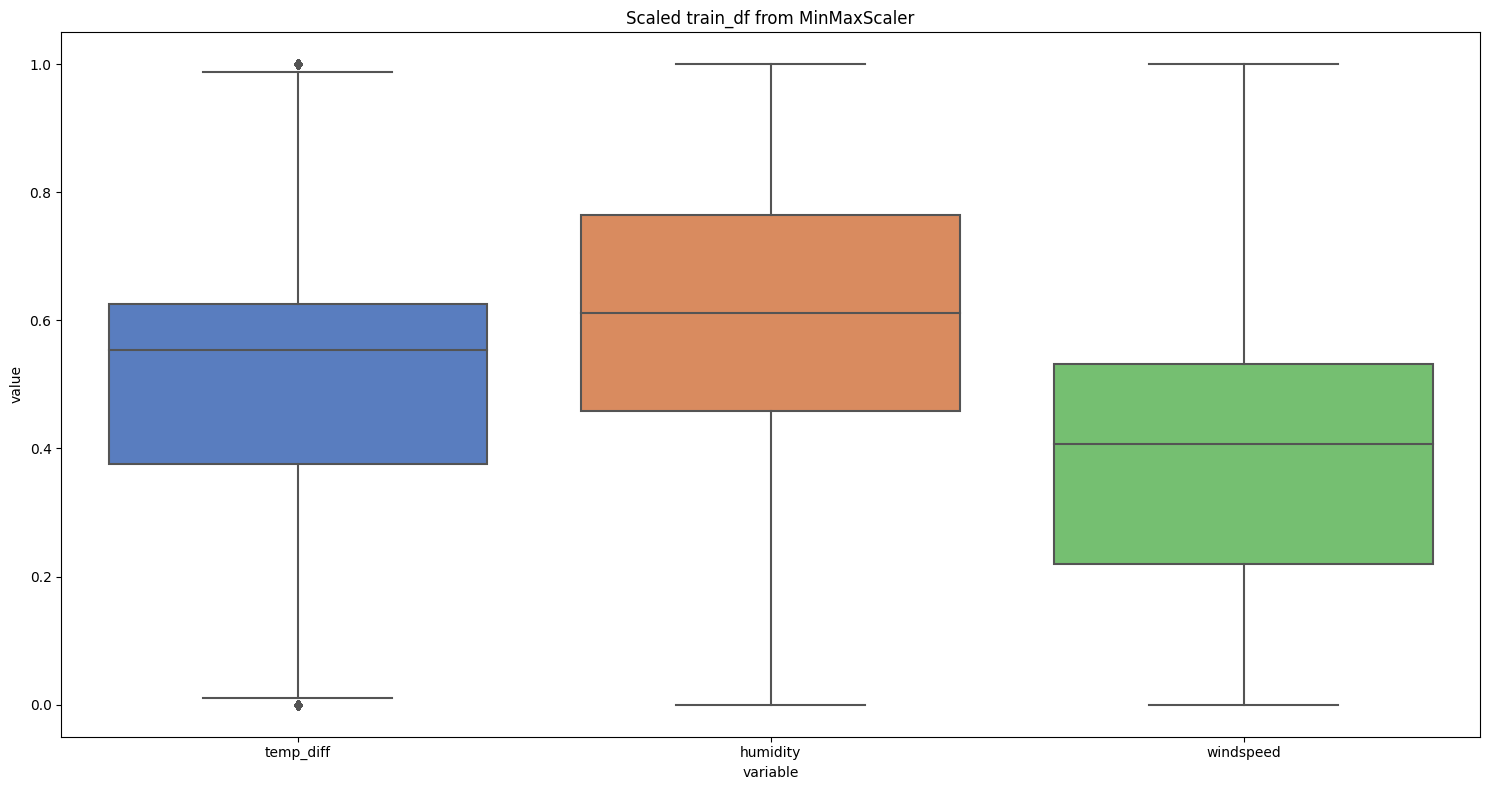

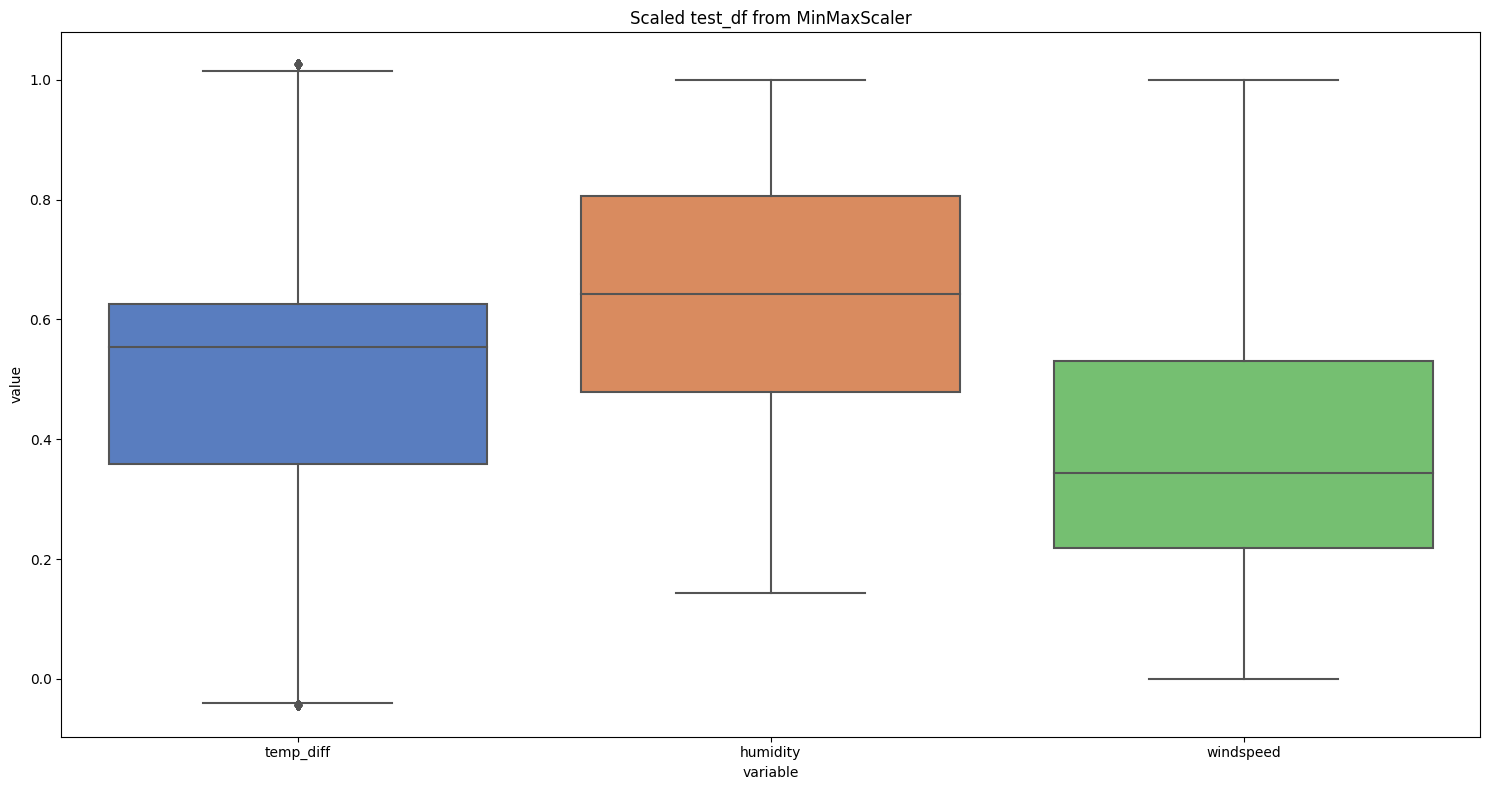

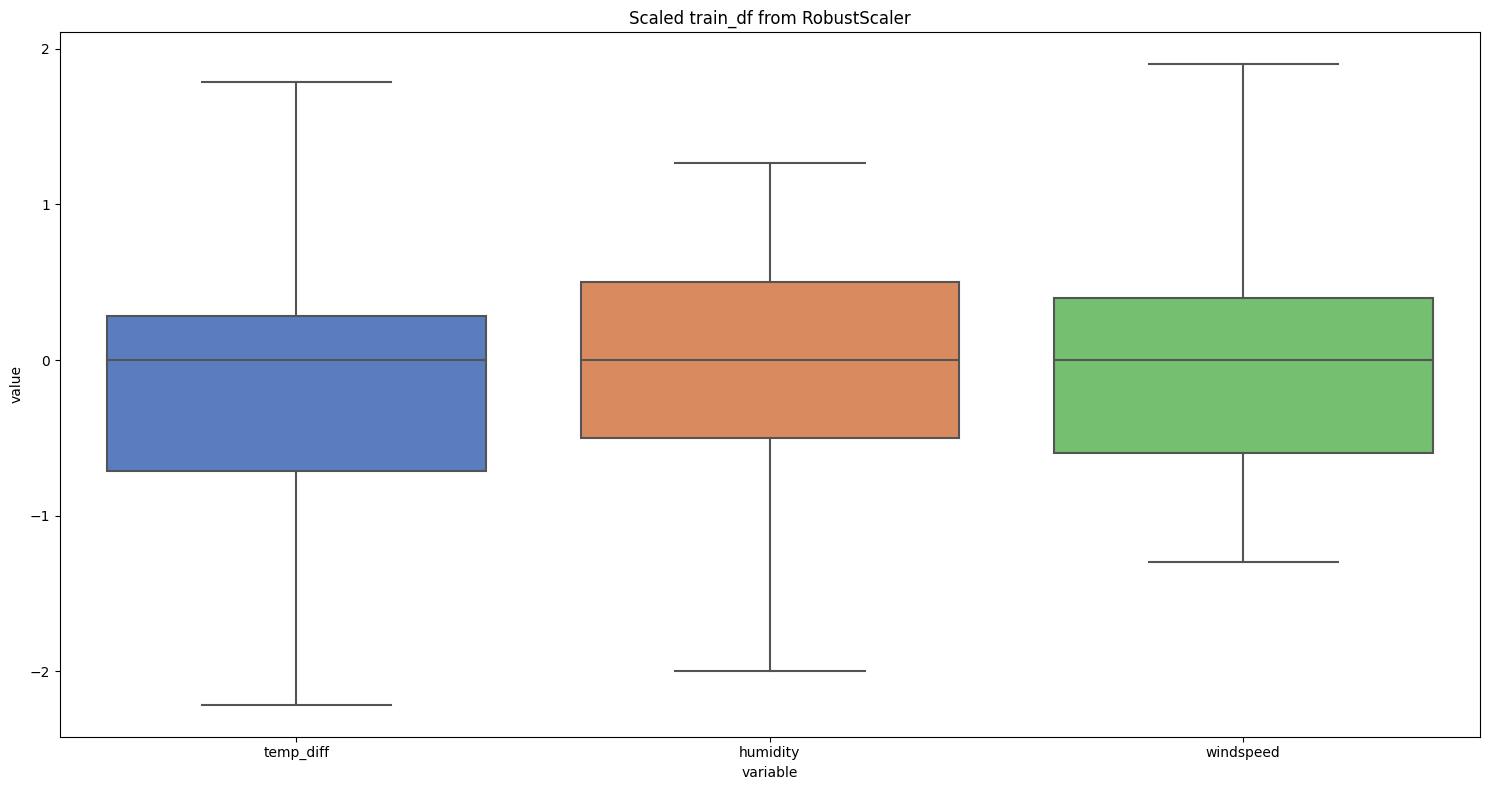

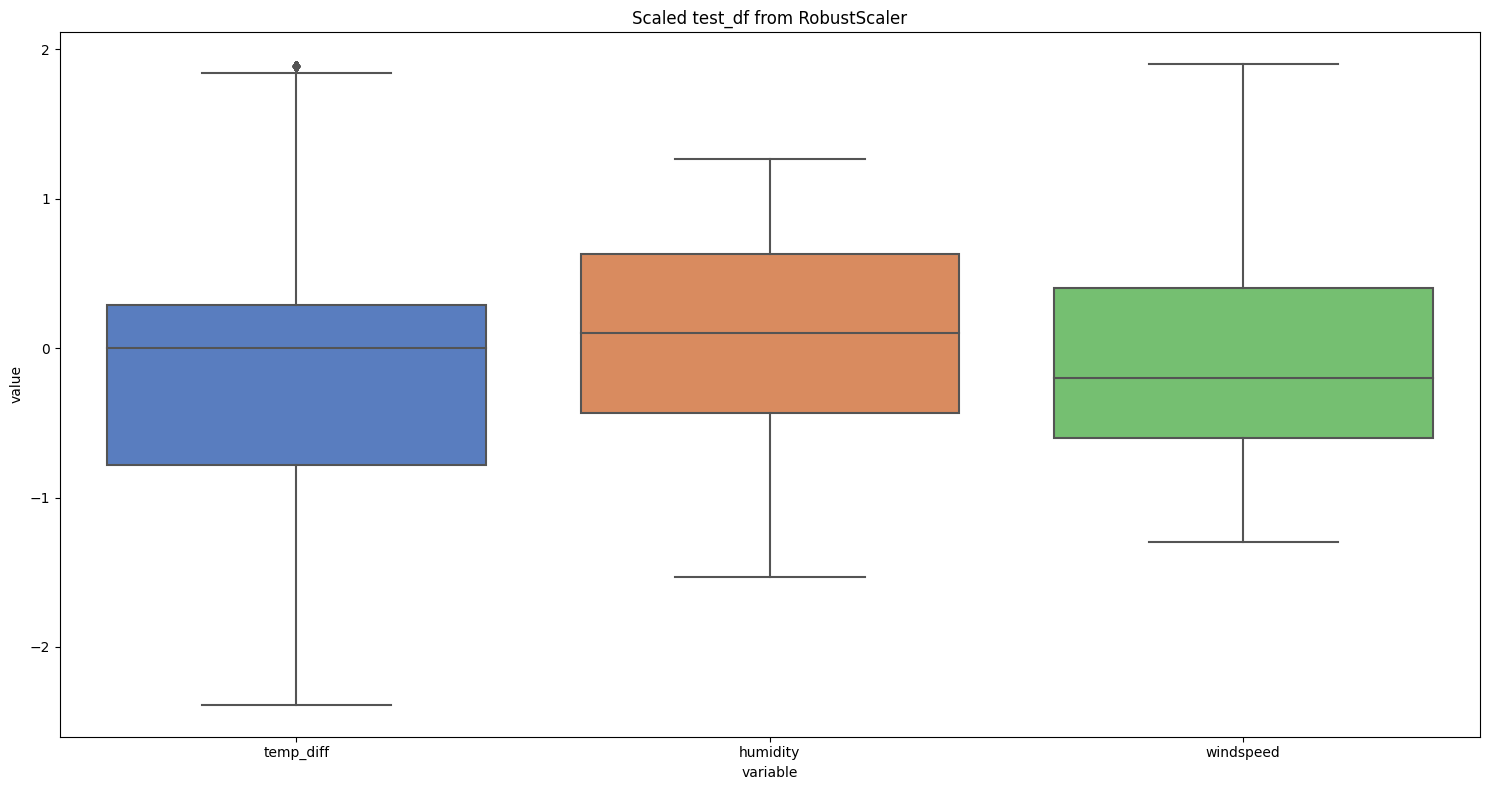

In [29]:
# FutureWarning 무시
warnings.simplefilter(action='ignore', category=FutureWarning)
scaled_df_lst = [SD_train_df, SD_test_df, MM_train_df, MM_test_df, RB_train_df, RB_test_df]
numeric_cols = ['temp_diff', 'humidity', 'windspeed']
title_lst = [
    'Scaled train_df from StandardScaler',
    'Scaled test_df from StandardScaler',
    'Scaled train_df from MinMaxScaler',
    'Scaled test_df from MinMaxScaler',
    'Scaled train_df from RobustScaler',
    'Scaled test_df from RobustScaler'
]
# 데이터 melt 후 boxplot 그리기
for i, df in enumerate(scaled_df_lst):
    melted_df = df[numeric_cols].melt(var_name='variable', value_name='value')
    title = title_lst[i]
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=melted_df, x='variable', y='value', palette='muted')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 선형 회귀분석 모델링란

---

GridSearchCV를 통해 최적의 파라미터 값을 찾아내었다.

RSMLE를 사용할 때 target값에 0이나 음수값이 존재하면 계산할 수 없으므로 y값을 `log1p`를 통해 로그로 변환

In [30]:
# RSMLE 함수 정의
def rsmle(y_true, y_pred):
    # 로그 변환 후 RSMLE 계산
    y_true = np.log1p(y_true)  # log(1 + X)
    y_pred = np.log1p(y_pred)  # log(1 + X)
    
    # RSMLE 계산: RMSE로 로그 변환된 데이터의 오류를 평가
    return np.sqrt(mean_squared_error(y_true, y_pred))

변수의 중요도를 출력하기위한 함수를 작성하였다.

In [45]:
def importance_feature_plt(best_model, train_data):
    # 그래프 크기 조정
    plt.figure(figsize=(10, 6))  

    # 모델이 선형 회귀인지, 트리 기반 모델인지 확인
    if hasattr(best_model, "coef_"):  # 선형 모델일 경우
        importance = best_model.coef_
    elif hasattr(best_model, "feature_importances_"):  # 랜덤 포레스트 같은 트리 모델일 경우
        importance = best_model.feature_importances_
    else:
        raise AttributeError("The model does not have `coef_` or `feature_importances_`.")

    # feature importance를 Series로 변환하여 정렬
    feature_importance = pd.Series(importance, index=train_data.columns).sort_values(ascending=False)

    # Seaborn을 사용하여 막대 그래프 생성
    sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='muted')

    # x축 레이블 회전
    plt.xticks(rotation=90)

    # 그래프 기본 설정
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()


## Linear Regressor

---

In [32]:
# lr_regressor_func 함수 정의
def lr_regressor_func(feature, target):
    # 모델 초기화
    LR = LinearRegression()

    # 파라미터 설정
    param = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }

    # RSMLE 스코어 함수 생성
    rsmle_scorer = make_scorer(rsmle, greater_is_better=False)

    # 그리드 서치 수행
    grid_model = GridSearchCV(estimator=LR, param_grid=param, cv=5, n_jobs=-1, scoring=rsmle_scorer)
    grid_model.fit(feature, np.log1p(target))

    # 그리드 서치 결과 출력
    print(f'Best Parameters : {grid_model.best_params_}')
    print(f'Best Score : {-grid_model.best_score_}')

    return grid_model.best_estimator_

In [33]:
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            sd_lr_best_model = lr_regressor_func(scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            mm_lr_best_model = lr_regressor_func(scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            rb_lr_best_model = lr_regressor_func(scaled_df_lst[i], train_target_df)
        
        print('\n')

Result of StandardScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598786027


Result of MinMaxScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.242833445987866


Result of RobustScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598785855




**Best Scaler**

- 세 스케일러 모두 비슷한 성능을 보임
    - `{'fit_intercept': True, 'positive': False}`
    - `0.24283344598786255`

### 변수 중요도 시각화

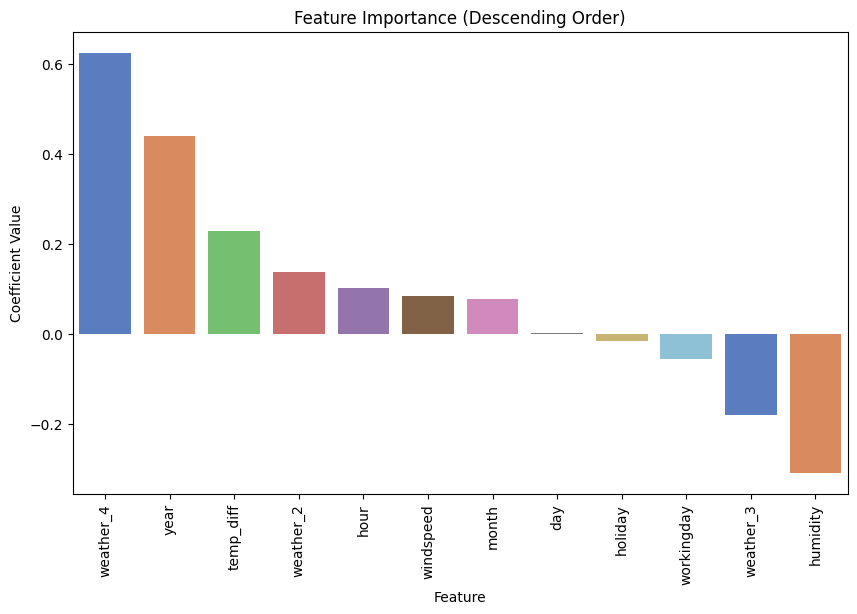

In [34]:
# 변수 중요도 출력
importance_feature_plt(sd_lr_best_model, scaled_df_lst[0])

## Lasso

---

In [35]:
# lasso 함수 정의
def lasso_func(feature, target):
    # 모델 초기화
    lasso = Lasso()

    # 파라미터 설정
    param = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }

    # RSMLE 스코어 함수 생성
    rsmle_scorer = make_scorer(rsmle, greater_is_better=False)

    # 그리드 서치 수행
    grid_model = GridSearchCV(estimator=lasso, param_grid=param, cv=5, n_jobs=-1, scoring=rsmle_scorer)
    grid_model.fit(feature, np.log1p(target))

    # 그리드 서치 결과 출력
    print(f'Best Parameters : {grid_model.best_params_}')
    print(f'Best Score : {-grid_model.best_score_}')

    return grid_model.best_estimator_

In [36]:
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            sd_lasso_best_model = lasso(scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            mm_lasso_best_model = lasso(scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            rb_lasso_best_model = lasso(scaled_df_lst[i], train_target_df)
        print('\n')

Result of StandardScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598786027


Result of MinMaxScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.242833445987866


Result of RobustScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598785855




**Best Scaler**

- 세 스케일러 모두 비슷한 성능을 보임
    - `{'fit_intercept': False, 'positive': True}`
    - `0.26574507804388914`

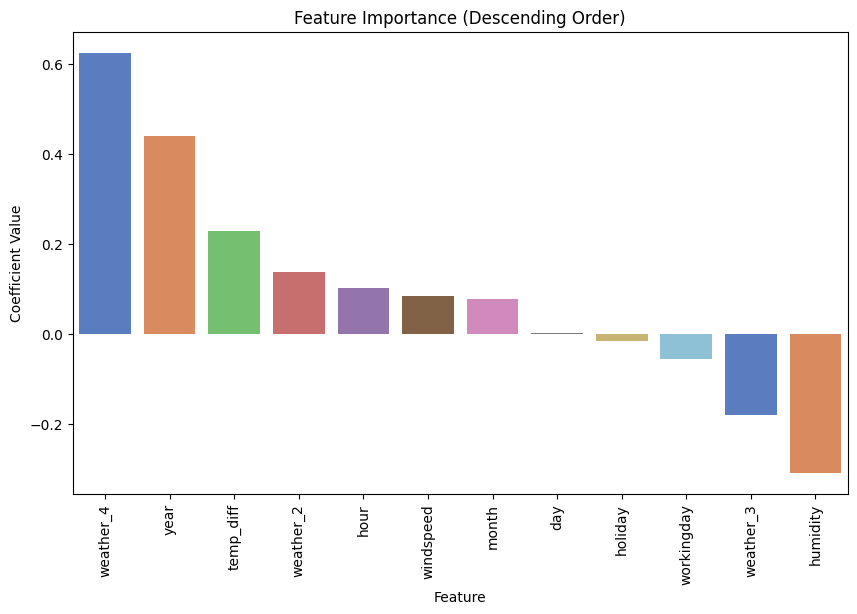

In [37]:
# 변수 중요도 출력
importance_feature_plt(sd_lr_best_model, scaled_df_lst[0])

## Ridge

---

In [38]:
# Ridge 함수 정의
def ridge_func(feature, target):
    # 모델 초기화
    ridge = Ridge()

    # 파라미터 설정
    param = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }

    # RSMLE 스코어 함수 생성
    rsmle_scorer = make_scorer(rsmle, greater_is_better=False)

    # 그리드 서치 수행
    grid_model = GridSearchCV(estimator=ridge, param_grid=param, cv=5, n_jobs=-1, scoring=rsmle_scorer)
    grid_model.fit(feature, np.log1p(target))

    # 그리드 서치 결과 출력
    print(f'Best Parameters : {grid_model.best_params_}')
    print(f'Best Score : {-grid_model.best_score_}')

    return grid_model.best_estimator_

In [39]:
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            sd_ridge_best_model = ridge_func(scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            mm_ridge_best_model = ridge_func(scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            rb_ridge_best_model = ridge_func(scaled_df_lst[i], train_target_df)
        print('\n')

Result of StandardScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598786027


Result of MinMaxScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.242833445987866


Result of RobustScaler
Best Parameters : {'fit_intercept': True, 'positive': False}
Best Score : 0.24283344598785855




**Best Scaler**

- 세 스케일러 모두 비슷한 성능을 보임
    - `{'fit_intercept': True, 'positive': False}`
    - `0.2428329942289224`

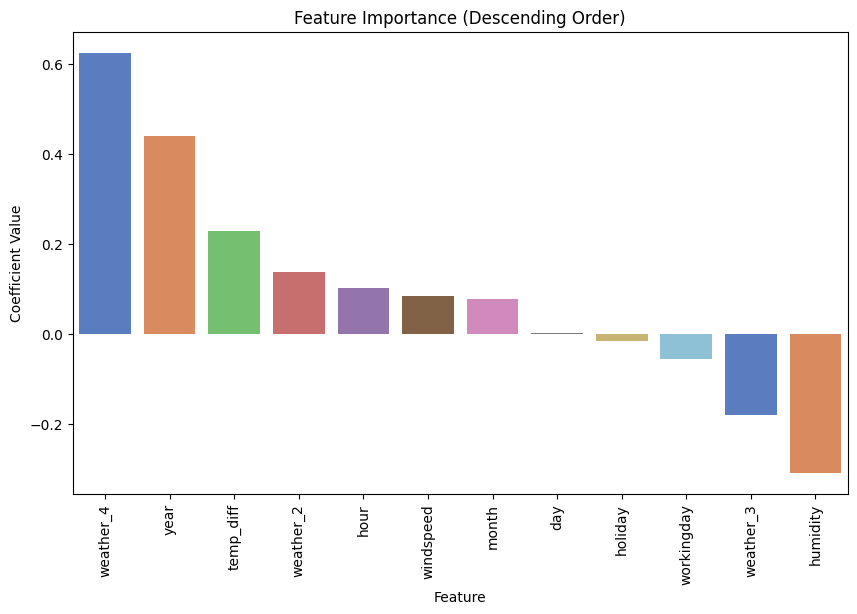

In [40]:
# 변수 중요도 출력
importance_feature_plt(sd_lr_best_model, scaled_df_lst[0])

# 비선형 회귀 머신러닝 모델 구성

---

비선형 모델은 다음과 같은 특성을 가진다.

- 비선형 모델은 특성 간의 관계를 자유롭게 학습하는 방식이기에, 스케일링의 영향을 받지 않는다.
- 라벨링 되어있는 범주형 변수들도 그 값들의 순서나 크기를 중요하게 고려하지 않기 때문에, One-Hot Encoding을 굳이 진행하지 않아도 된다.

이하 각 모델별 결과값 도출은 다음과 같이 진행 하였다.

- input 데이터는 다음과 같은 데이터를 input하여 결과값을 도출하였다.
    - datetime을 연/월/일/시간별로 구분한 Raw 데이터
    - 선형회귀에 사용한 Scaled 데이터
- 내가 설정한 GridSearch에 지정할 파라미터 값을 넣는다.
- GridSearchCV를 이용하여 가장 최적의 파라미터 값을 찾는다.
- 모델의 평가 점수는 RSMLE 값을 도출한다.

## 비선형 모델 함수 설정

In [41]:
def decision_tree_func(kind, feature, target):
    # kind값에 따른 모델 초기화
    if kind == 'RF':
        model = RandomForestRegressor(random_state=42)

        param = {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif kind == 'GB':
        model = GradientBoostingRegressor(random_state=42)

        param = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
        
    elif kind == 'XGB':
        model = xgb.XGBRegressor(random_state=42)

        param = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }

    else:
        model = LGBMRegressor(random_state=42)

        param = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [20, 30, 40],
            'subsample': [0.8, 0.9, 1.0]
        }

    # RSMLE 스코어 함수 생성
    rsmle_scorer = make_scorer(rsmle, greater_is_better=False)
    
    # 그리드 서치 수행
    grid_model = GridSearchCV(estimator=model, param_grid=param, cv=5, n_jobs=-1, scoring=rsmle_scorer)
    grid_model.fit(feature, np.log1p(target))

    # 그리드 서치 결과 출력
    print(f'Best Parameters : {grid_model.best_params_}')
    print(f'Best Score : {-grid_model.best_score_}')

    return grid_model.best_estimator_

## RandomForest

---

In [42]:
#원본 데이터 수행
best_rf_model = decision_tree_func('RF', train_feature_df, train_target_df)

Best Parameters : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score : 0.10859456191822163


In [43]:
# Scaled된 데이터 수행
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            best_sd_rf_model = decision_tree_func('RF', scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            best_mm_rf_model = decision_tree_func('RF', scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            best_rb_rf_model = decision_tree_func('RF', scaled_df_lst[i], train_target_df)
        
        print('\n')

Result of StandardScaler
Best Parameters : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Score : 0.11293346966590563


Result of MinMaxScaler
Best Parameters : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Score : 0.11295451531577375


Result of RobustScaler
Best Parameters : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Score : 0.11293209447274




**가장 높게 나온 데이터 : Raw Data**

`Best Parameters`

- `max_depth` : `15`
- `min_samples_leaf` : `4`
- `min_samples_split` : `5`
- `n_estimators` : `300`

`Best Score (RMSLE)` : `0.10821955492791364`

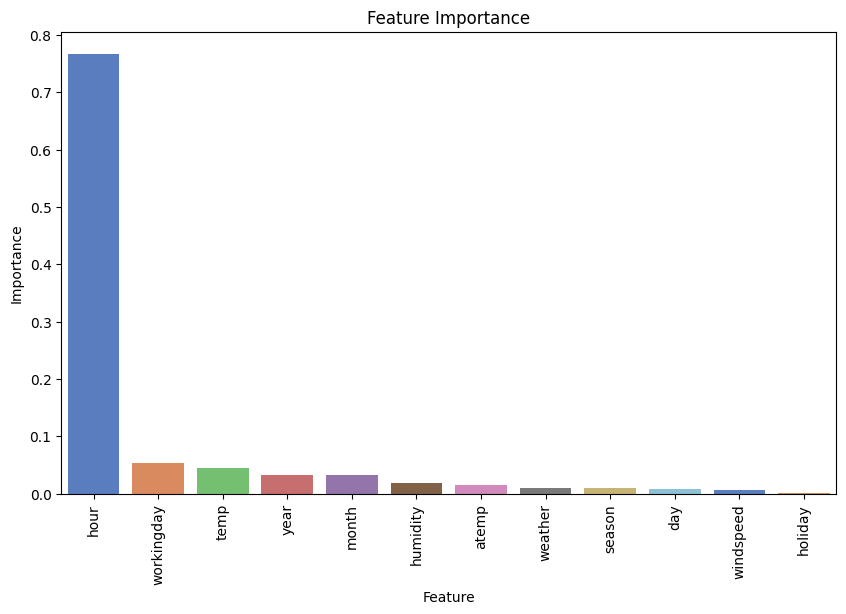

In [46]:
# 변수 중요도 출력
importance_feature_plt(best_rf_model, train_feature_df)

## GradientBoosting

---

In [48]:
#원본 데이터 수행
best_gb_model = decision_tree_func('GB', train_feature_df, train_target_df)

Best Parameters : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Score : 0.09669434892860171


In [49]:
# Scaled된 데이터 수행
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            best_sd_gb_model = decision_tree_func('GB', scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            best_mm_gb_model = decision_tree_func('GB', scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            best_rb_gb_model = decision_tree_func('GB', scaled_df_lst[i], train_target_df)
        
        print('\n')

Result of StandardScaler
Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score : 0.10299486431662197


Result of MinMaxScaler
Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score : 0.10284426867861929


Result of RobustScaler
Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score : 0.10291689027099396




**가장 높게 나온 데이터 : Raw Data**

`Best Parameters`

- `learing_rate` : `0.05`
- `max_depth` : `5`
- `n_estimators` : `300`
- `subsample` : `0.9`

`Best Score (RMSLE)` : `0.09669434892860171`

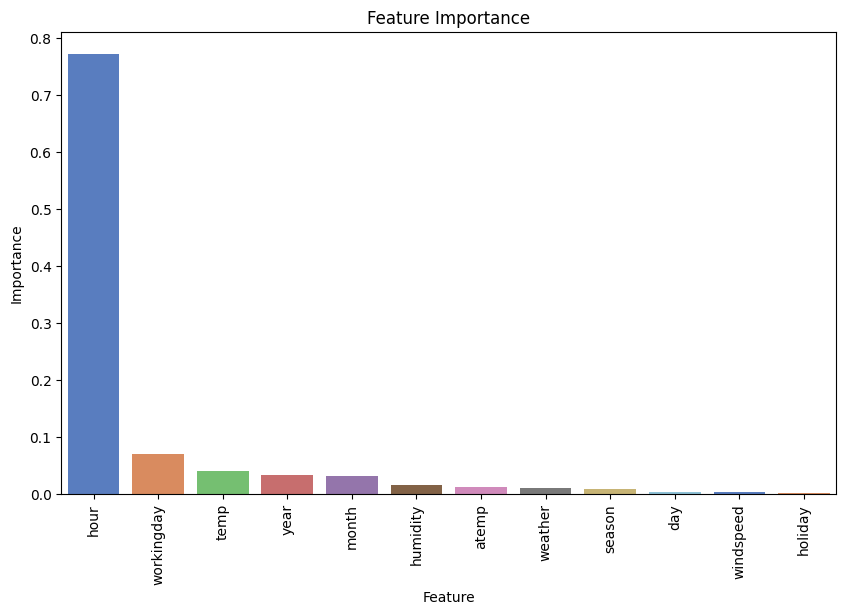

In [50]:
# 변수 중요도 출력
importance_feature_plt(best_gb_model, train_feature_df)

## XGBoost

---

In [51]:
#원본 데이터 수행
best_xgb_model = decision_tree_func('XGB', train_feature_df, train_target_df)

Best Parameters : {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score : 0.09782854081356063


In [52]:
# Scaled된 데이터 수행
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            best_sd_xgb_model = decision_tree_func('XGB', scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            best_mm_xgb_model = decision_tree_func('XGB', scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            best_rb_xgb_model = decision_tree_func('XGB', scaled_df_lst[i], train_target_df)
        
        print('\n')

Result of StandardScaler
Best Parameters : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best Score : 0.10266053002552127


Result of MinMaxScaler
Best Parameters : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best Score : 0.10266053002552127


Result of RobustScaler
Best Parameters : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best Score : 0.10266053002552127




**가장 높게 나온 데이터 : Raw Data**

`Best Parameters`

- `colsample_bytree` : `0.9`
- `learning_rate` : `0.1`
- `max_depth` : `5`
- `n_estimators` : `200`

`Best Score (RMSLE)` : `0.09782854081356063`

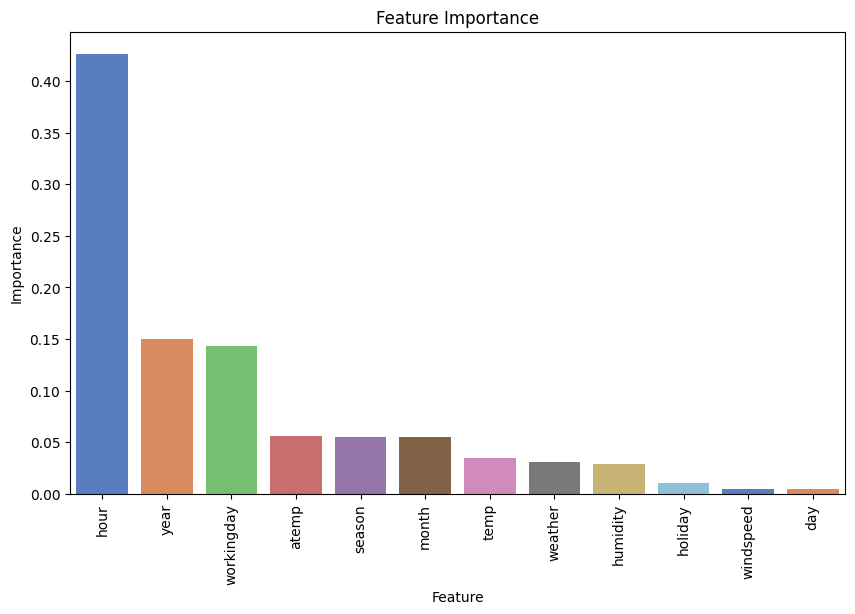

In [57]:
# 변수 중요도 출력
importance_feature_plt(best_xgb_model, train_feature_df)

## LightGBM

---

In [54]:
#원본 데이터 수행
best_lgbm_model = decision_tree_func('LGBM', train_feature_df, train_target_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 10886, number of used features: 12
[LightGBM] [Info] Start training from score 4.591364
Best Parameters : {'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 20, 'subsample': 0.8}
Best Score : 0.09980283289547538


In [55]:
# Scaled된 데이터 수행
for i in range(0, len(scaled_df_lst)):
    if i % 2 == 0:
        if i == 0:
            print('Result of StandardScaler')
            best_sd_lgbm_model = decision_tree_func('LGBM', scaled_df_lst[i], train_target_df)
        if i == 2:
            print('Result of MinMaxScaler')
            best_mm_lgbm_model = decision_tree_func('LGBM', scaled_df_lst[i], train_target_df)
        if i == 4:
            print('Result of RobustScaler')
            best_rb_lgbm_model = decision_tree_func('LGBM', scaled_df_lst[i], train_target_df)
        
        print('\n')

Result of StandardScaler
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 10886, number of used features: 11
[LightGBM] [Info] Start training from score 4.591364
Best Parameters : {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.8}
Best Score : 0.10433081566340582


Result of MinMaxScaler
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 10886, number of used features: 11
[LightGBM] [Info] Start training from score 4.591364
Best Parameters : {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves

**가장 높게 나온 데이터 : Raw Data**

`Best Parameters`

- `max_depth` : `15`
- `min_samples_leaf` : `4`
- `min_samples_split` : `5`
- `n_estimators` : `300`

`Best Score (RMSLE)` : `0.10821955492791364`

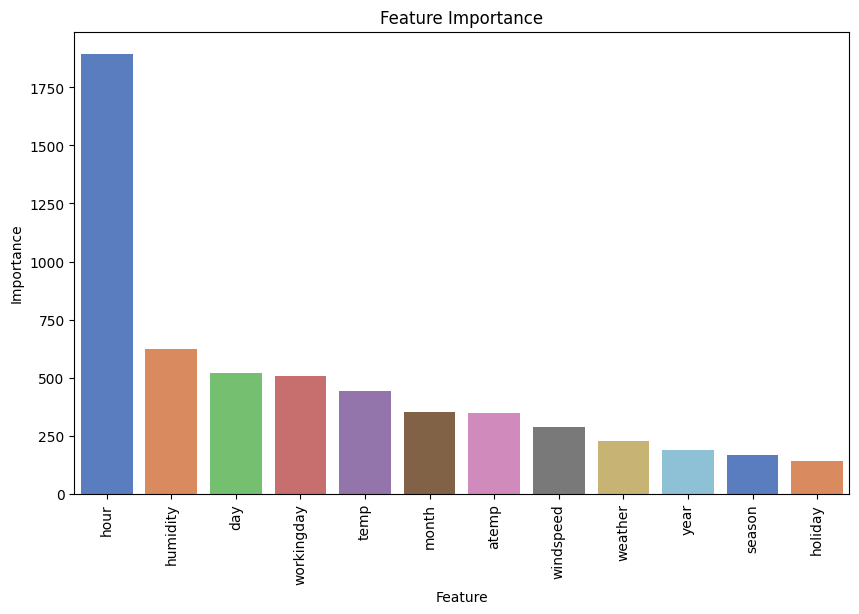

In [58]:
# 변수 중요도 출력
importance_feature_plt(best_lgbm_model, train_feature_df)

## 성능이 좋은 모델 export

In [59]:
import pickle

# 모델 저장
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

# 모델 불러오기
with open("best_xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [65]:
# 예측값 얻기
test_pred_log = best_xgb_model.predict(test_df)

# 역변환 적용 (log1p → expm1)
test_pred = np.expm1(test_pred_log)

submission = pd.DataFrame()
submission['datetime'] = pd.read_csv(os.path.join(dirname, filename))['datetime']
submission['cnt'] = test_pred

submission.to_csv('submission.csv', index=False)

## 모델링 분석 인사이트

---

- **RandomForest, GradientBoosting, XGBoost, LightGBM모델 중 XGBoost에서 score가 가장 낮게 나왔으므로, XGBoost가 가장 예측력이 좋은 모델이다.**
- **모든 모델에서 변수의 중요도는** `hour`**컬럼이 압도적으로 높은 값을 보여준다.**
- **그 다음으로** `workingday`, `temp`, `year`, `month` **순서대로 중요도를 보여준다.**

# 분석 결론

---

EDA를 통한 분석 인사이트와 모델링을 통한 분석 인사이트를 통해 다음과 같은 분석 결론을 내릴 수 있었다.

## 출퇴근 시간, 직장인들을 위한 수요 증가 반영하기 위한 솔루션

---

출퇴근 시간에 자전거 대여량이 급증하므로, 이에 대한 공급 조절 및 운영 전략이 필요합니다. 이를 해결하기 위한 방안은 다음과 같다.

### **1. 출퇴근이 많은 장소(회사, 주택가 및 아파트)에 자전거 다수 배치**

- 대중교통과 연계된 자전거 정류장 확대 (지하철역, 버스 정류장 근처)
- 대여소 위치를 데이터 기반으로 최적화하여 수요가 많은 곳에 집중 배치
- AI 기반 실시간 수요 예측을 활용해 자전거 재배치 자동화

### **2. 모바일 앱을 활용한 예약 및 실시간 모니터링 시스템 도입**

- 모바일 앱에서 실시간으로 대여 가능 자전거 수를 확인하도록 시스템 개선
- 출퇴근 시간대 예약 기능 추가해 이용자의 대기 시간 단축
- AI 추천 시스템을 도입해 사용자 맞춤형 대여소 및 경로 안내

### **3. 출퇴근 시간대 할인 및 구독 플랜 프로모션 진행**

- 정기 구독 플랜 제공 (예: 월간 출퇴근 전용 패스)
- 피크 타임(출퇴근 시간) 전용 할인 쿠폰 제공하여 이용 활성화
- 기업 제휴를 통한 직원 전용 할인 및 복지 혜택 제공

## 날씨에 따른 자전거 수리 비용 절감

---

날씨가 악화될수록 대여량이 감소하는 경향을 보이며, 이와 함께 자전거의 손상 가능성도 증가한다. 이를 최소화하기 위한 방안은 다음과 같다.

### **1. 자전거 보관소 설치 및 보호 시설 강화**

- 우천 및 폭설 시 자전거를 안전하게 보관할 수 있도록 지붕형 대여소 확충
- 실시간 날씨 데이터를 활용한 대여소별 자동 보호 시스템 적용 (예: 강풍 시 자동 차단)
- 자전거 보관소 내 CCTV 및 보안 시스템 강화하여 도난 및 파손 방지

### **2. 자전거 유지보수 관리 강화**

- 주기적인 장비 점검 및 정비 일정을 자동화 (IoT 센서를 활용한 실시간 고장 감지)
- 악천후 이후 집중 정비 시스템 도입하여 장비 수명을 연장
- 날씨에 따른 부품 손상 분석을 통해 비용 절감 전략 수립

## 전국 단위 데이터 추가

---

현재 특정 지역 데이터를 기반으로 분석이 진행되고 있는 것으로 보이며, 보다 일반화된 수요 예측 모델을 만들기 위해 전국 단위 데이터 추가가 필요하다. 이를 위한 전략은 다음과 같다.

### **1. 다양한 도시로 서비스 확장**

- 대도시뿐만 아니라 중소도시에도 자전거 대여 시스템 확대
- 지역별 특성을 반영한 맞춤형 대여 시스템 도입 (예: 관광지 중심 자전거 대여소)
- 지역별 교통 인프라 및 이용 패턴을 분석하여 최적의 서비스 제공

### **2. 전국 단위 데이터 수집 및 활용**

- 각 지역별 기후, 인구밀도, 도로 환경 등을 반영한 수요 예측 모델 고도화
- 전국 데이터를 활용한 머신러닝 모델 재학습을 통해 예측 정확도 향상
- 정부 및 지자체와 협업하여 공공 데이터 연계 및 정책 지원 확보

### **3. 수요 기반 맞춤형 서비스 제공**

- 지역별 이용 패턴에 맞춘 요금제 및 대여 방식 도입 (예: 관광지에서는 시간제 요금제, 출퇴근 도시는 구독제)
- 스마트시티 연계 프로젝트로 자전거 공유 시스템을 도시 교통 정책과 통합